# Stage Two - Data Understanding

Table of Content:
0. Loading Modules, Functions and Dataset
1. Review Orignal Data Sets with SWEETVIZ
> Dataset Size
>
> Dataset Datatypes
>
> Dataset Statistics
>
> Dataset Zero's and Nan's
>
> Visualize Dataset
>
> Dataset Skewness
>
> Correlation Analysis

## 0: Loading Modules, Functions and Dataset

This section is to load and modules and the original dataset from a CSV file into a dataframe


In [ ]:
# importing  packages
import numpy as np
import pandas as pd
# import matplotlib
# import matplotlib.pyplot as plt
# import seaborn as sns

### Automated EDA Python package - SWEETVIZ

In [ ]:
!pip install sweetviz

In [ ]:
import sweetviz

###Set other defaults

In [ ]:
pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# #pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', -1)
# pd.set_option('display.width', 200)
#pd.set_option('max_rows', 100)


### Functions
This section is where all the functions are


### Load CSVs into a Pandas dataframe
This section is to load the original dataset from a CSV file into a dataframe


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# 
%%bash
ln -s drive/My\ Drive/BUAN\ 6590\ -\ Capstone/ Capstone

ln: failed to create symbolic link 'Capstone/BUAN 6590 - Capstone': File exists


In [ ]:
## Datasets
activity_csv_file        = '/content/Capstone/DATA/df_activity_orig.csv'
body_battery_csv_file    = '/content/Capstone/DATA/df_body_battery_orig.csv'
results_metrics_csv_file = '/content/Capstone/DATA/df_metrics_orig.csv'
sleep_records_csv_file   = '/content/Capstone/DATA/df_sleep_orig.csv'

survey_reg_xlsx_file     = '/content/Capstone/DATA/PT Health Study  Registrations_orig.xlsx'
survey_base_xlsx_file    = '/content/Capstone/DATA/PT Health Study Baseline Survey_orig.xlsx'
survey_weekly_xlsx_file  = '/content/Capstone/DATA/PT Health Study Weekly Survey_orig.xlsx'


### Look at Activity expanded
activity_new_csv_file     = '/content/Capstone/DATA/df_activity_new.csv'


In [ ]:
# Import the original data from a excel to Pandas Data frame
df_activity = pd.read_csv(activity_csv_file)
df_body_battery = pd.read_csv(body_battery_csv_file)
df_results_metrics = pd.read_csv(results_metrics_csv_file)
df_sleep_records = pd.read_csv(sleep_records_csv_file)
df_survey_reg = pd.read_excel(survey_reg_xlsx_file,'Form Responses 1')
df_survey_base = pd.read_excel(survey_base_xlsx_file,'Form Responses 1')
df_survey_weekly= pd.read_excel(survey_weekly_xlsx_file,'Form Responses 1')

### Look at Activity expanded
df_activity_new = pd.read_csv(activity_new_csv_file)

## 1. Load Datasets and initial analysis


This section is to load and modules and the original dataset from a CSV file into a dataframe


### Activity Records

In [ ]:
# Activities
print(df_activity.shape)
# print(df_activity.columns)
# print(df_activity.dtypes)
# print(df_activity.describe().T)
df_activity.head(5)


(200686, 11)


Unnamed: 0  ...                                             stress
0           0  ...  {'average': None, 'qualifier': None, 'duration...
1           1  ...  {'average': None, 'qualifier': None, 'duration...
2           2  ...  {'average': None, 'qualifier': None, 'duration...
3           3  ...  {'average': None, 'qualifier': None, 'duration...
4           4  ...  {'average': 20, 'qualifier': 'calm', 'duration...

[5 rows x 11 columns]

#### ACTIVITY - Expand column containing more than one metric
#### Activity Needs to have Heart rate and Stress columns  expanded

* Activity records 
  - Heart rate - {'minimum' 'maximum', 'resting'}
  - Stress Rate - {'average', 'qualifier', 'duration'{'rest', 'activity', 'low', 'medium', 'high'}}

##### Funciton - Expand Activiy records

In [ ]:
def splitHRandStress(df_act):
    '''
    Copys the passed Activity dataframe and then Expands and adds the heart rate columns and stress columns in the new dataframe
    Input 
    - df_act - df_activity dataframe
    Output
    - Return a new activity dataframe'
    '''  
    df_temp = df_act.copy(deep=True)

    df_temp['hr_min'] = df_act.heart_rate.str.split(pat=":|,|\n|}", n=- 1,expand=True)[1].values
    df_temp['hr_max'] = df_act.heart_rate.str.split(pat=":|,|\n|}", n=- 1,expand=True)[3].values
    df_temp['hr_res'] = df_act.heart_rate.str.split(pat=":|,|\n|}", n=- 1,expand=True)[5].values
    df_temp['stress_avg']          = df_act.stress.str.split(pat=":|,|\n|}|{", n=- 1,expand=True)[2].values
    df_temp['stress_qualifier']    = df_act.stress.str.split(pat=":|,|\n|}|{", n=- 1,expand=True)[4].values
    df_temp['stress_dur_rest']     = df_act.stress.str.split(pat=":|,|\n|}|{", n=- 1,expand=True)[8].values
    df_temp['stress_dur_activity'] = df_act.stress.str.split(pat=":|,|\n|}|{", n=- 1,expand=True)[10].values
    df_temp['stress_dur_low']      = df_act.stress.str.split(pat=":|,|\n|}|{", n=- 1,expand=True)[12].values
    df_temp['stress_dur_medium']   = df_act.stress.str.split(pat=":|,|\n|}|{", n=- 1,expand=True)[14].values
    df_temp['stress_dur_high']     = df_act.stress.str.split(pat=":|,|\n|}|{", n=- 1,expand=True)[16].values

    return df_temp


In [ ]:
df_activity_new = splitHRandStress(df_activity)


In [ ]:
# clean up columns
df_activity_new.drop(columns=df_activity_new.columns[0], axis=1, inplace=True)

In [ ]:
df_activity_new.head(5)

date  duration  ... stress_dur_medium stress_dur_high
0  2/12/2019     86400  ...              None            None
1  2/12/2019     86400  ...              None            None
2  2/12/2019     86400  ...              None            None
3  2/12/2019     86400  ...              None            None
4  2/12/2019     86400  ...              5040             960

[5 rows x 20 columns]

##### Write out Activity data frame with the extended columns

In [ ]:
# outPath = '/content/Capstone/DATA/df_activity_new.csv'
# df_activity_new.to_csv(outPath)

In [ ]:
# Activities NEW
print(df_activity_new.shape)
print(df_activity_new.columns)
print(df_activity_new.dtypes)
df_activity_new.describe().T

(200686, 20)
Index(['date', 'duration', 'entry_time', 'user_id', 'steps', 'floors',
       'intensity_minutes', 'active_kilocalories', 'heart_rate', 'stress',
       'hr_min', 'hr_max', 'hr_res', 'stress_avg', 'stress_qualifier',
       'stress_dur_rest', 'stress_dur_activity', 'stress_dur_low',
       'stress_dur_medium', 'stress_dur_high'],
      dtype='object')
date                    object
duration                 int64
entry_time              object
user_id                 object
steps                    int64
floors                 float64
intensity_minutes        int64
active_kilocalories      int64
heart_rate              object
stress                  object
hr_min                  object
hr_max                  object
hr_res                  object
stress_avg              object
stress_qualifier        object
stress_dur_rest         object
stress_dur_activity     object
stress_dur_low          object
stress_dur_medium       object
stress_dur_high         object
dtype: object

count          mean  ...      75%       max
duration             200686.0  86419.748164  ...  86400.0  144000.0
steps                200686.0   8571.963719  ...  11133.0  144918.0
floors               180229.0     12.460936  ...     15.0    1896.0
intensity_minutes    200686.0     40.096369  ...     60.0    2044.0
active_kilocalories  200686.0    566.772161  ...    764.0   13546.0

[5 rows x 8 columns]

#### Sweetviz Report

In [ ]:
# my_report = sweetviz.analyze(df_activity)
# my_report.show_notebook()

                                             |          | [  0%]   00:00 -> (? left)


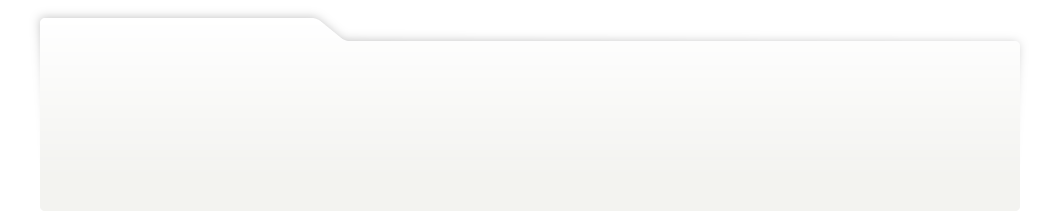
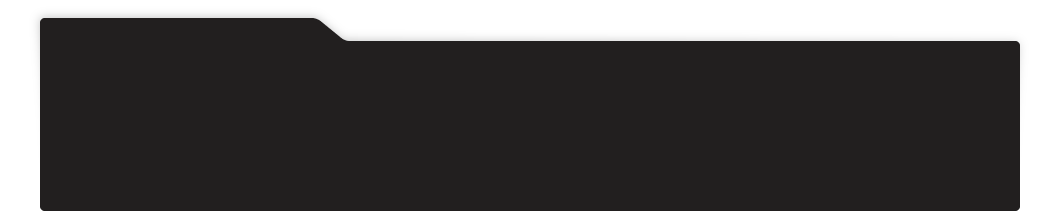
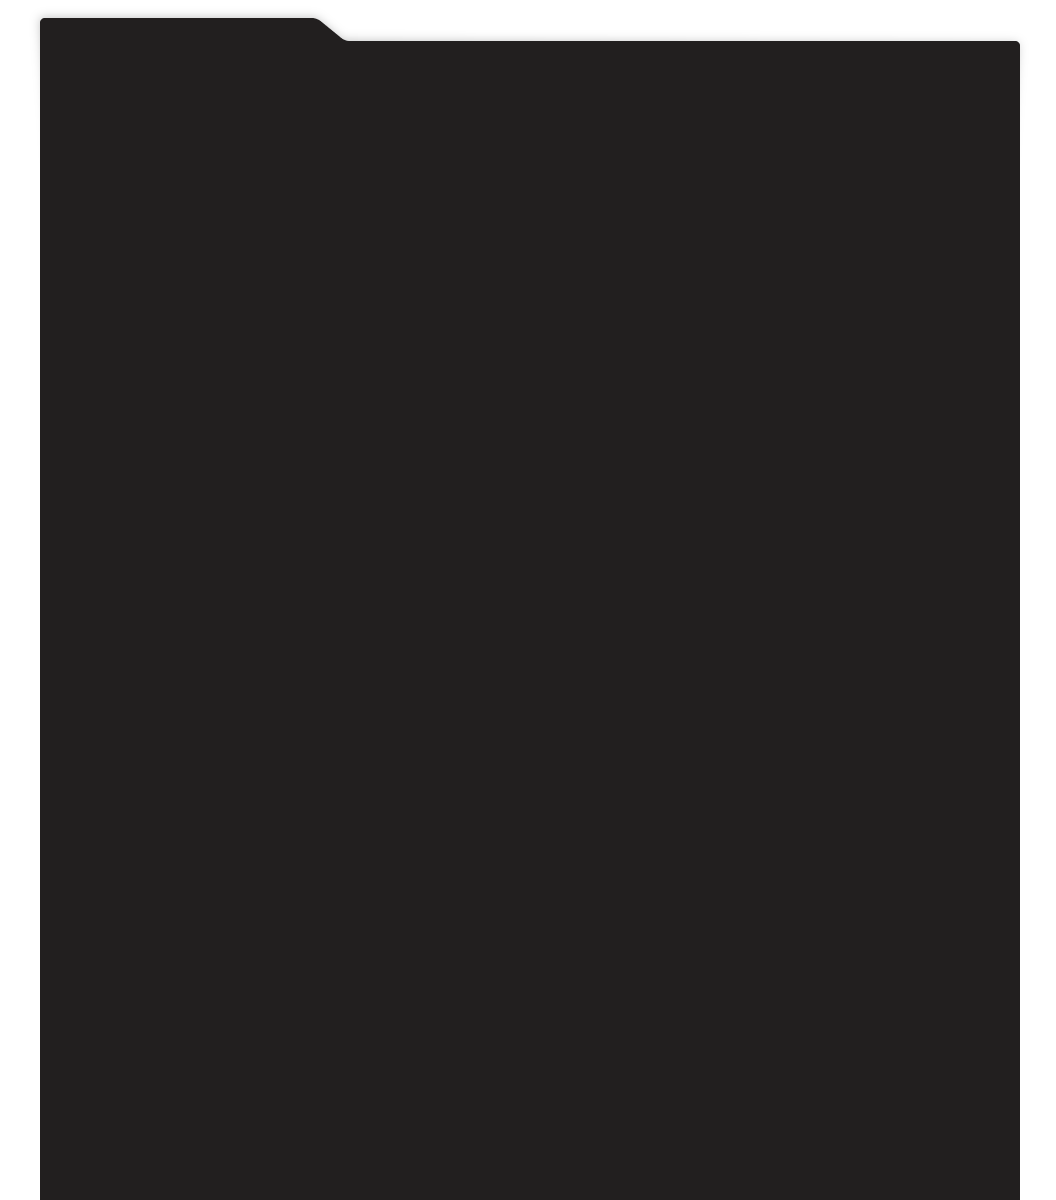
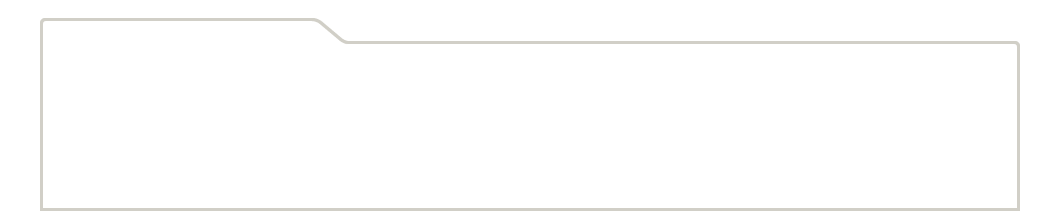
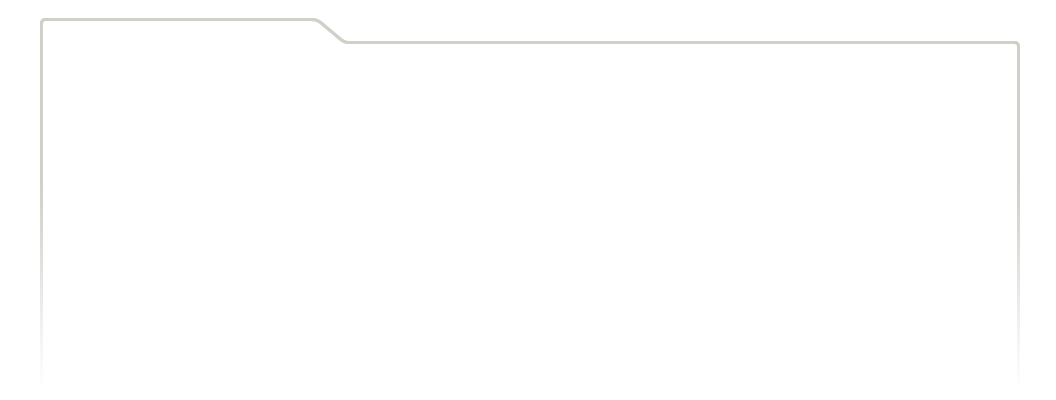
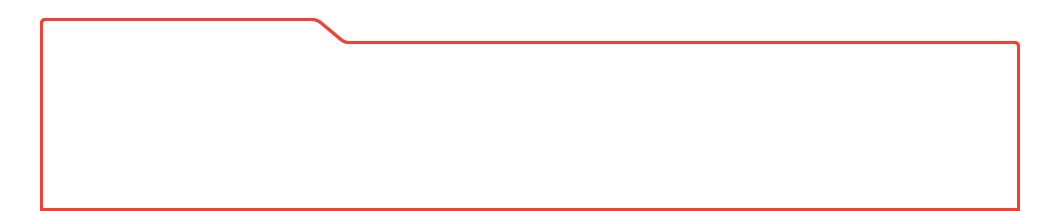
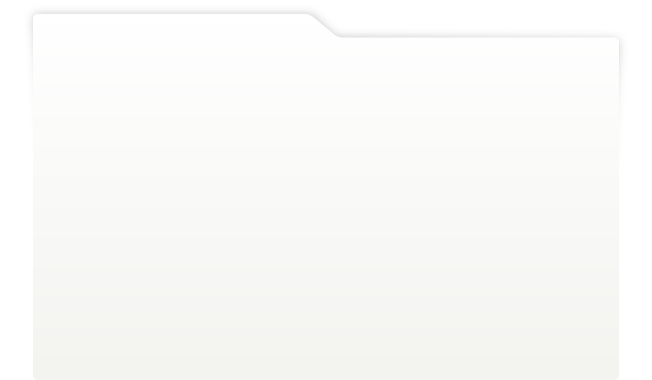
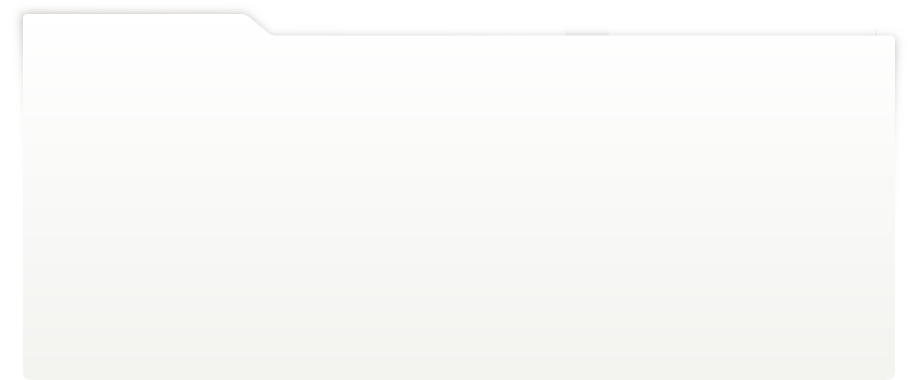
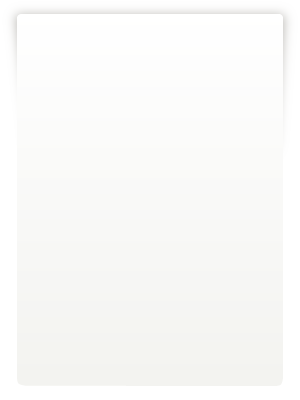
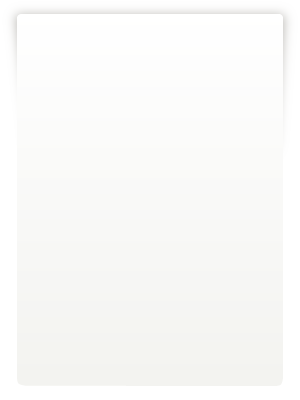
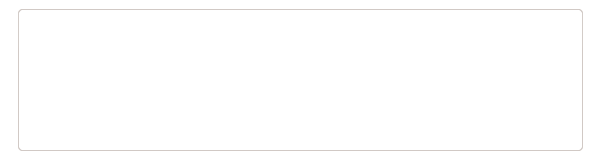
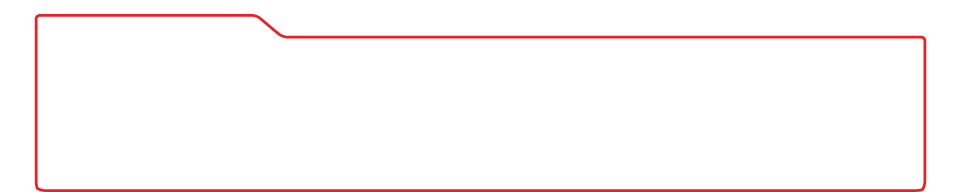
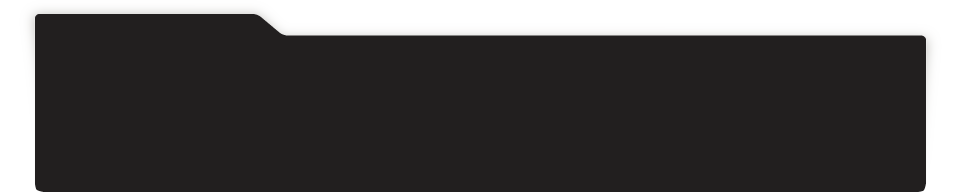
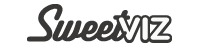
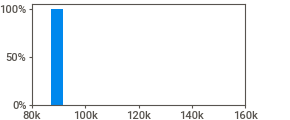
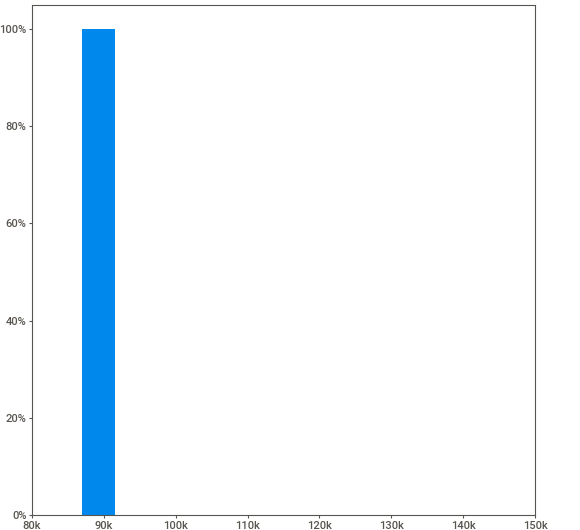
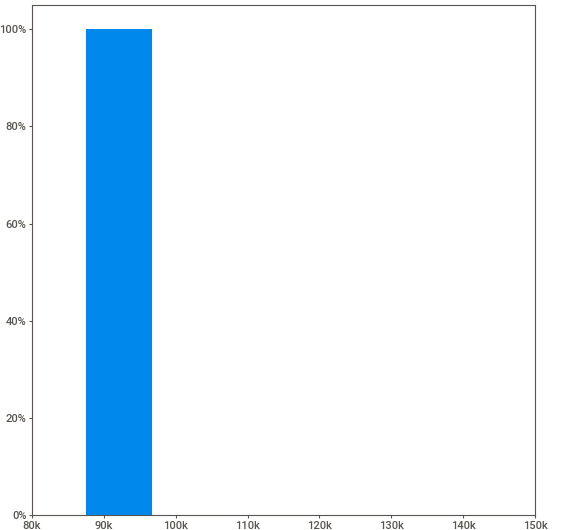
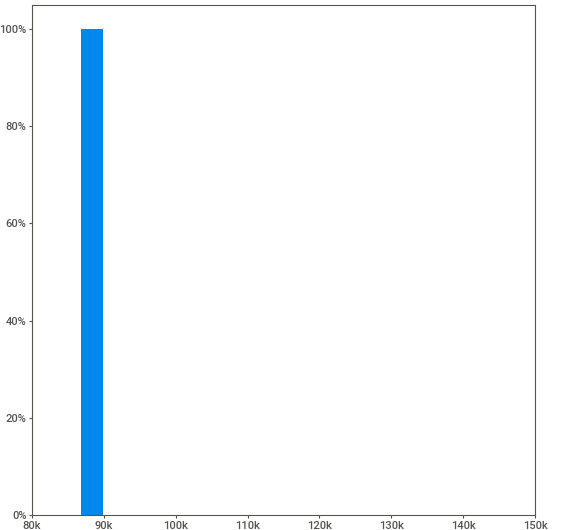
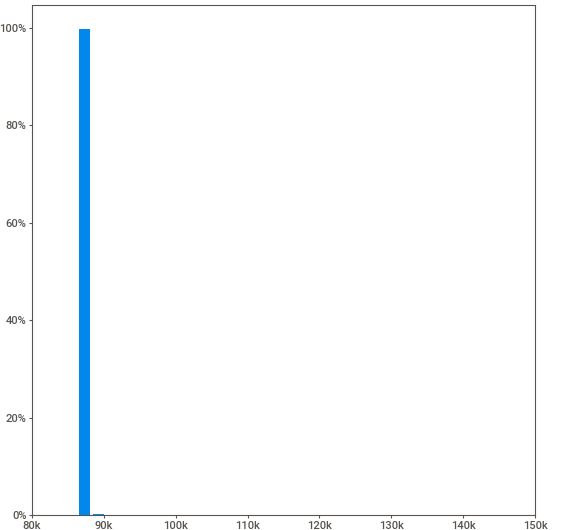
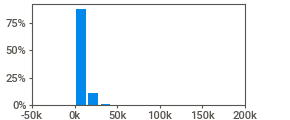
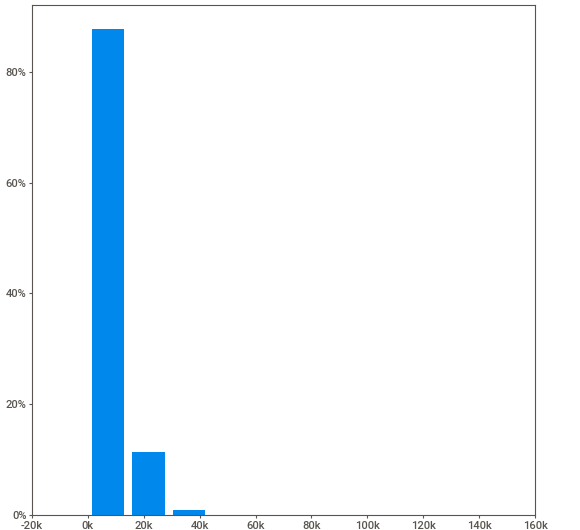
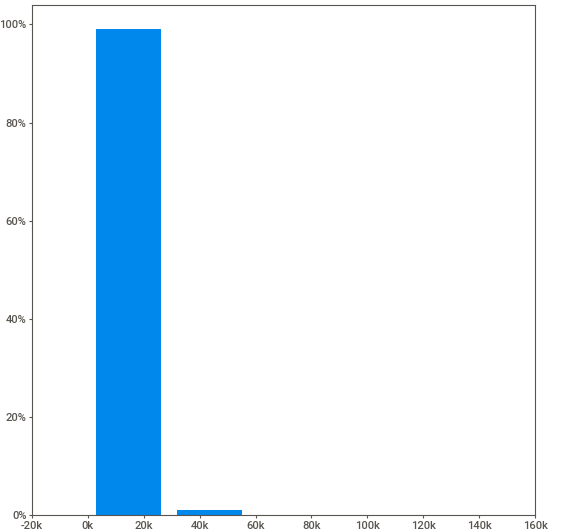
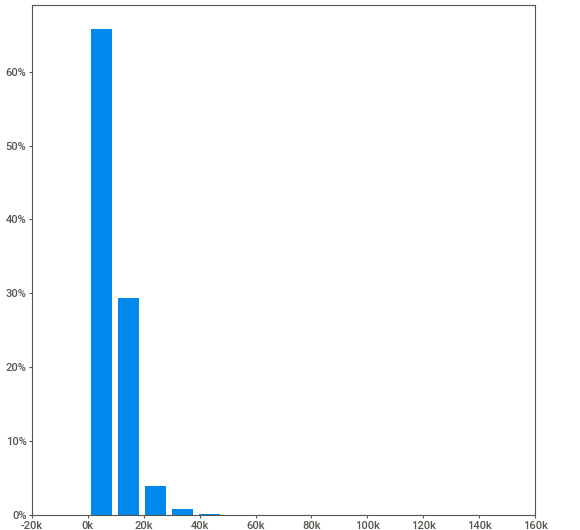
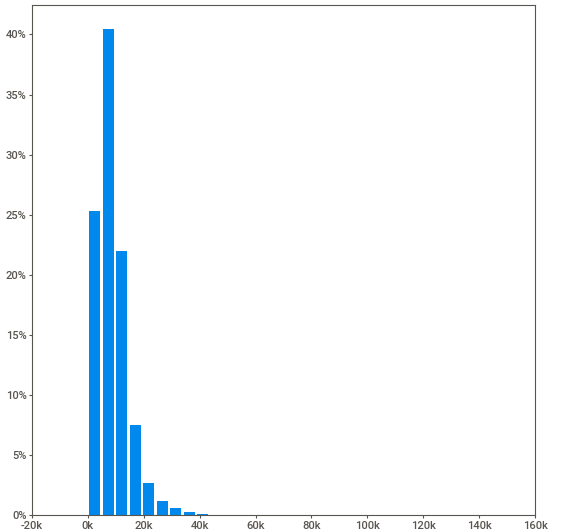
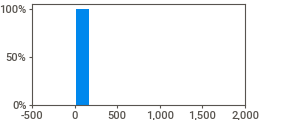
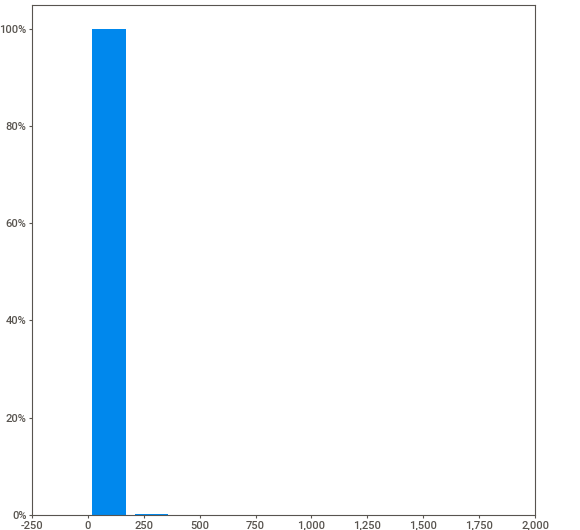
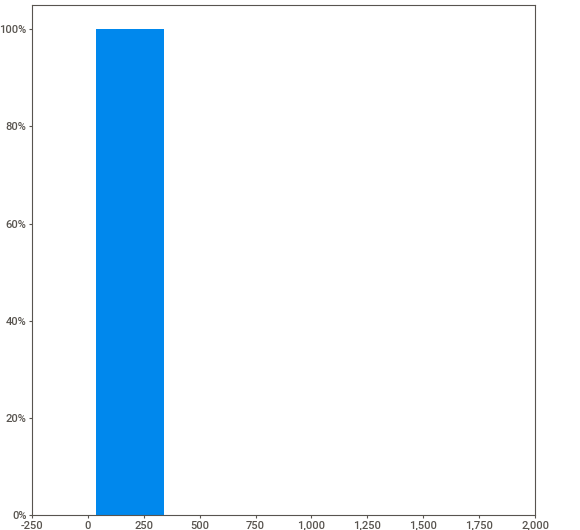
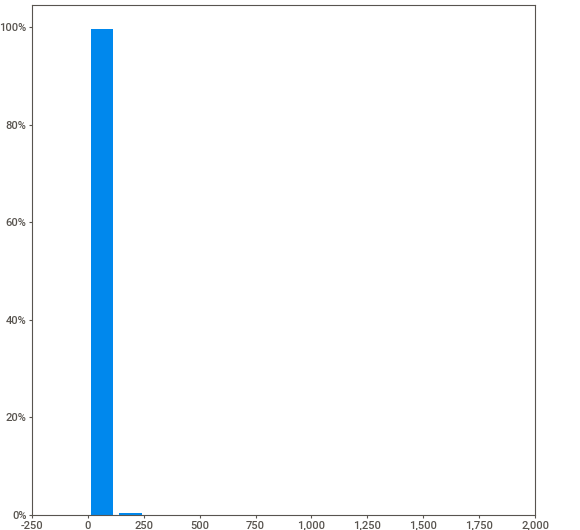
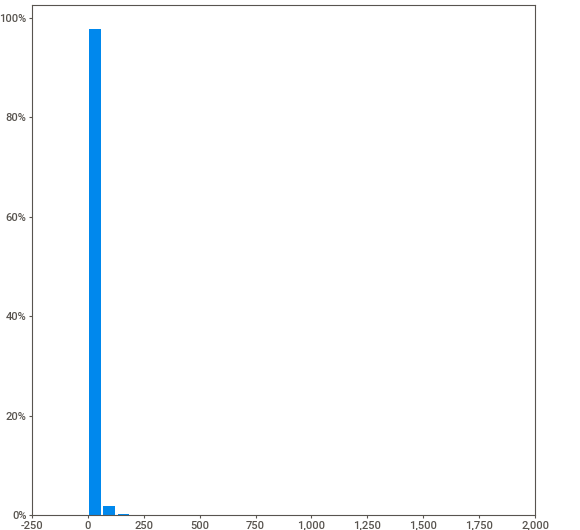
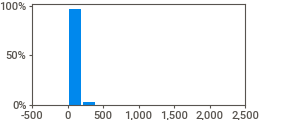
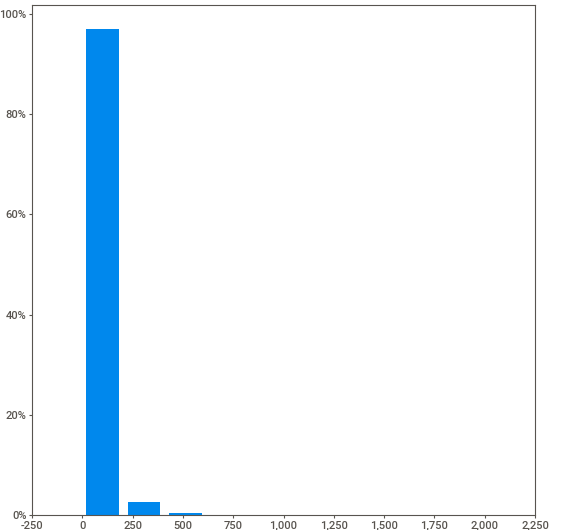
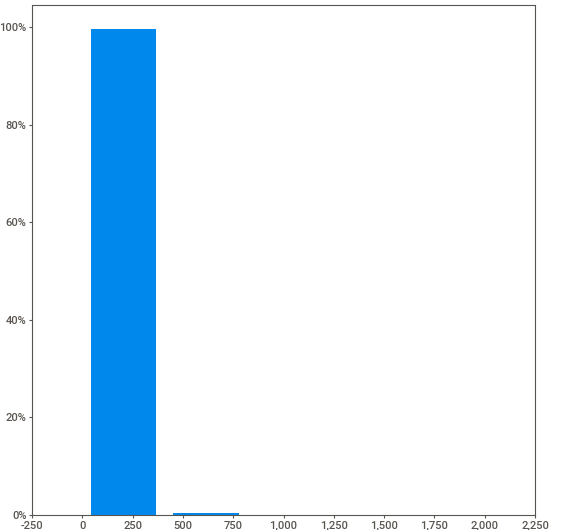
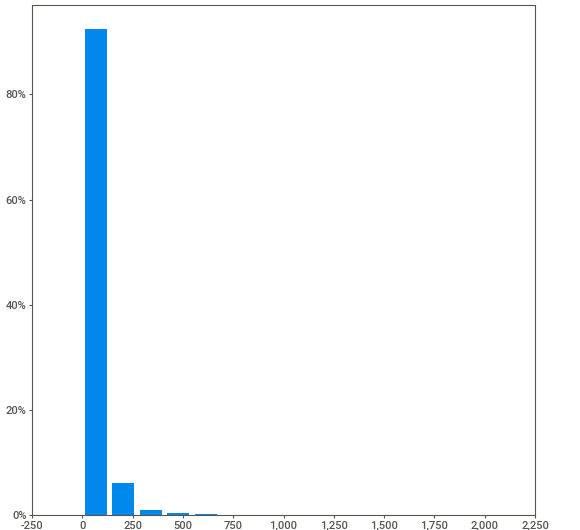
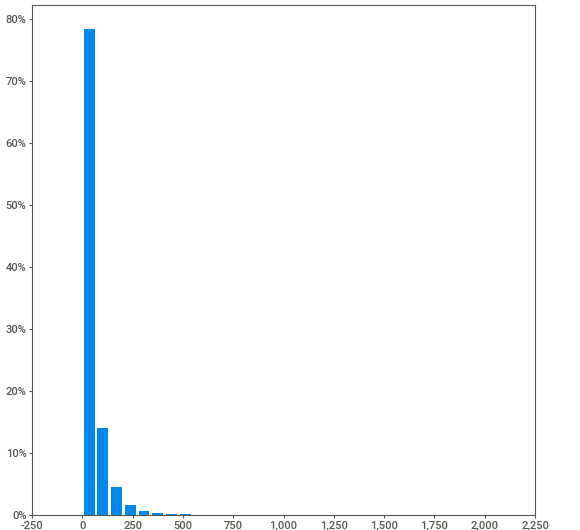
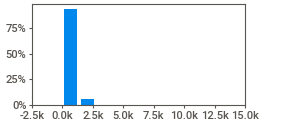
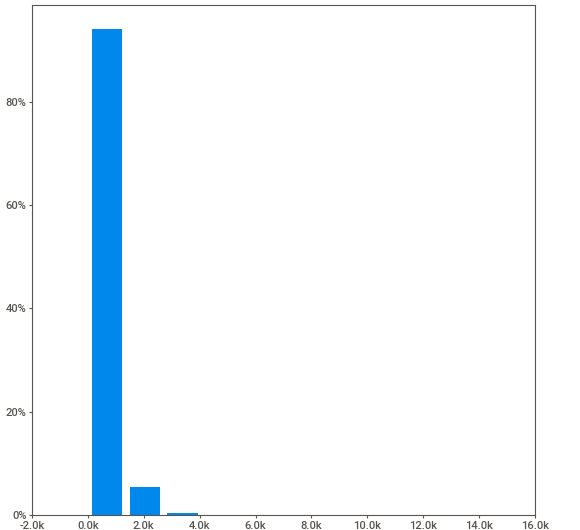
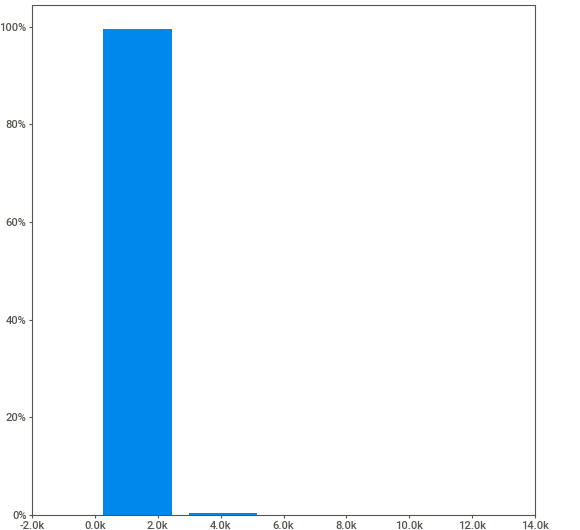
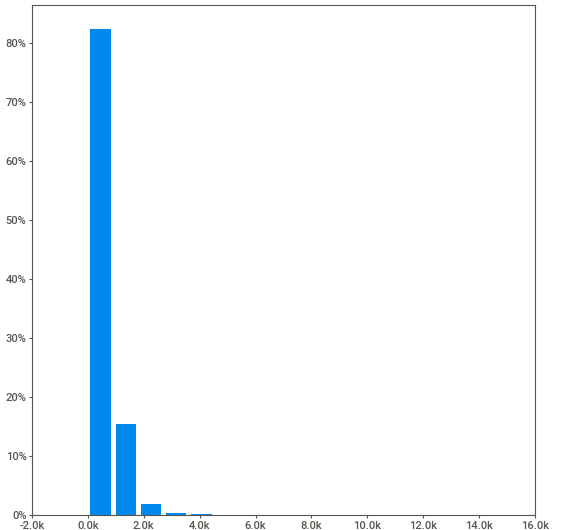
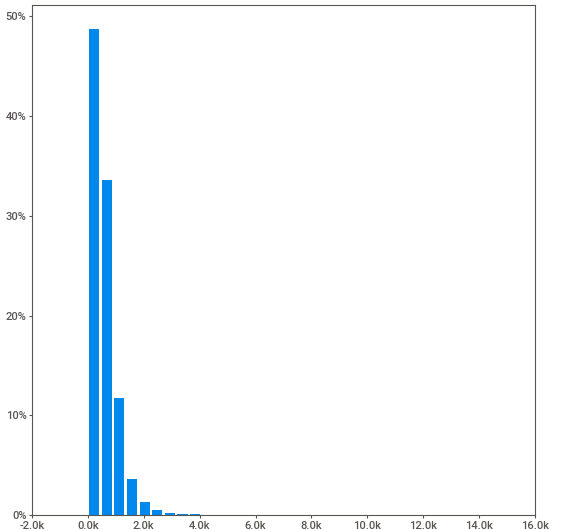
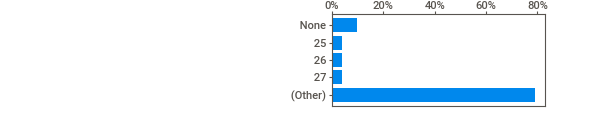
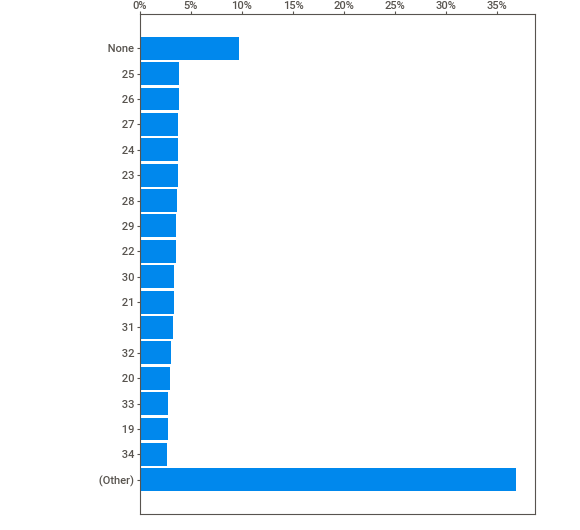
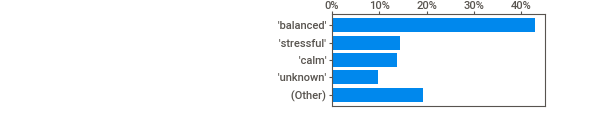
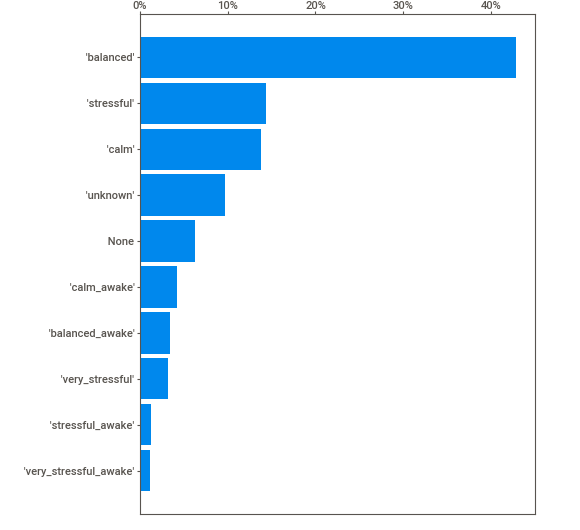
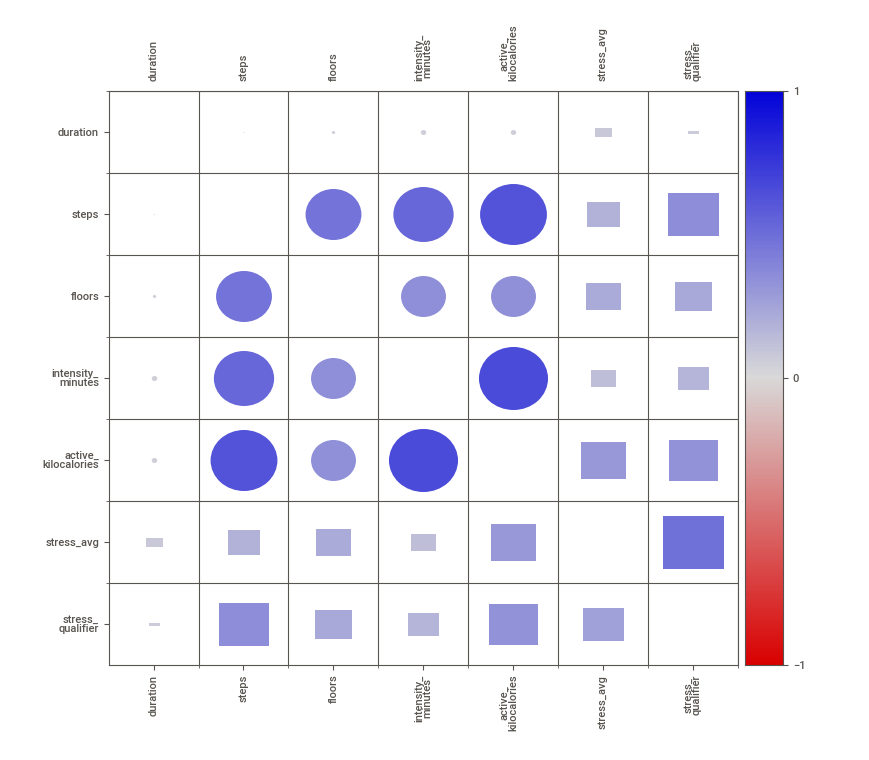
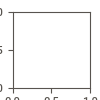

In [ ]:
my_report = sweetviz.analyze(df_activity_new)
my_report.show_notebook()

### Body Battery Record

In [ ]:
# Body Battery
print(df_body_battery.shape)
print(df_body_battery.dtypes)
#df_body_battery.head()
df_body_battery.describe().T


(138099, 10)
Unnamed: 0      int64
date           object
duration        int64
entry_time     object
user_id        object
minimum         int64
maximum         int64
morning       float64
midday        float64
evening       float64
dtype: object


count          mean           std  ...      50%       75%       max
Unnamed: 0  138099.0  69049.000000  39865.891750  ...  69049.0  103573.5  138098.0
duration    138099.0  86417.912802    414.532940  ...  86400.0   86400.0  144000.0
minimum     138099.0     29.568686     17.650543  ...     29.0      41.0     100.0
maximum     138099.0     78.448758     23.140889  ...     84.0     100.0     100.0
morning     130866.0     70.868453     24.157264  ...     77.0      90.0     100.0
midday      131586.0     50.907901     20.957177  ...     52.0      65.0     100.0
evening     131783.0     37.846202     20.305981  ...     36.0      51.0     100.0

[7 rows x 8 columns]

#### Sweetviz Report

                                             |          | [  0%]   00:00 -> (? left)


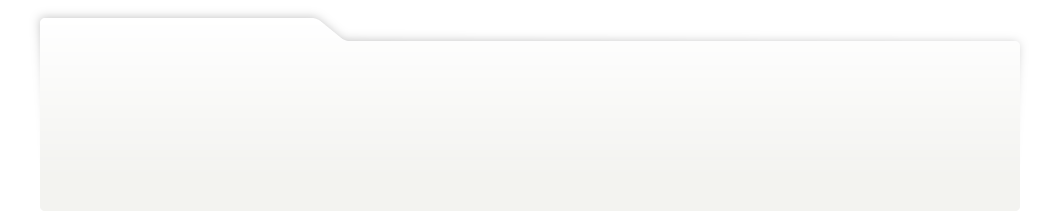
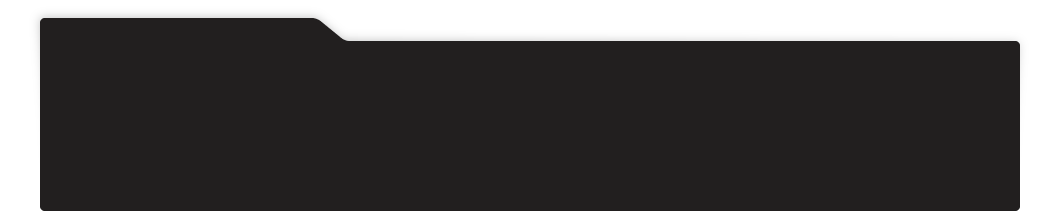
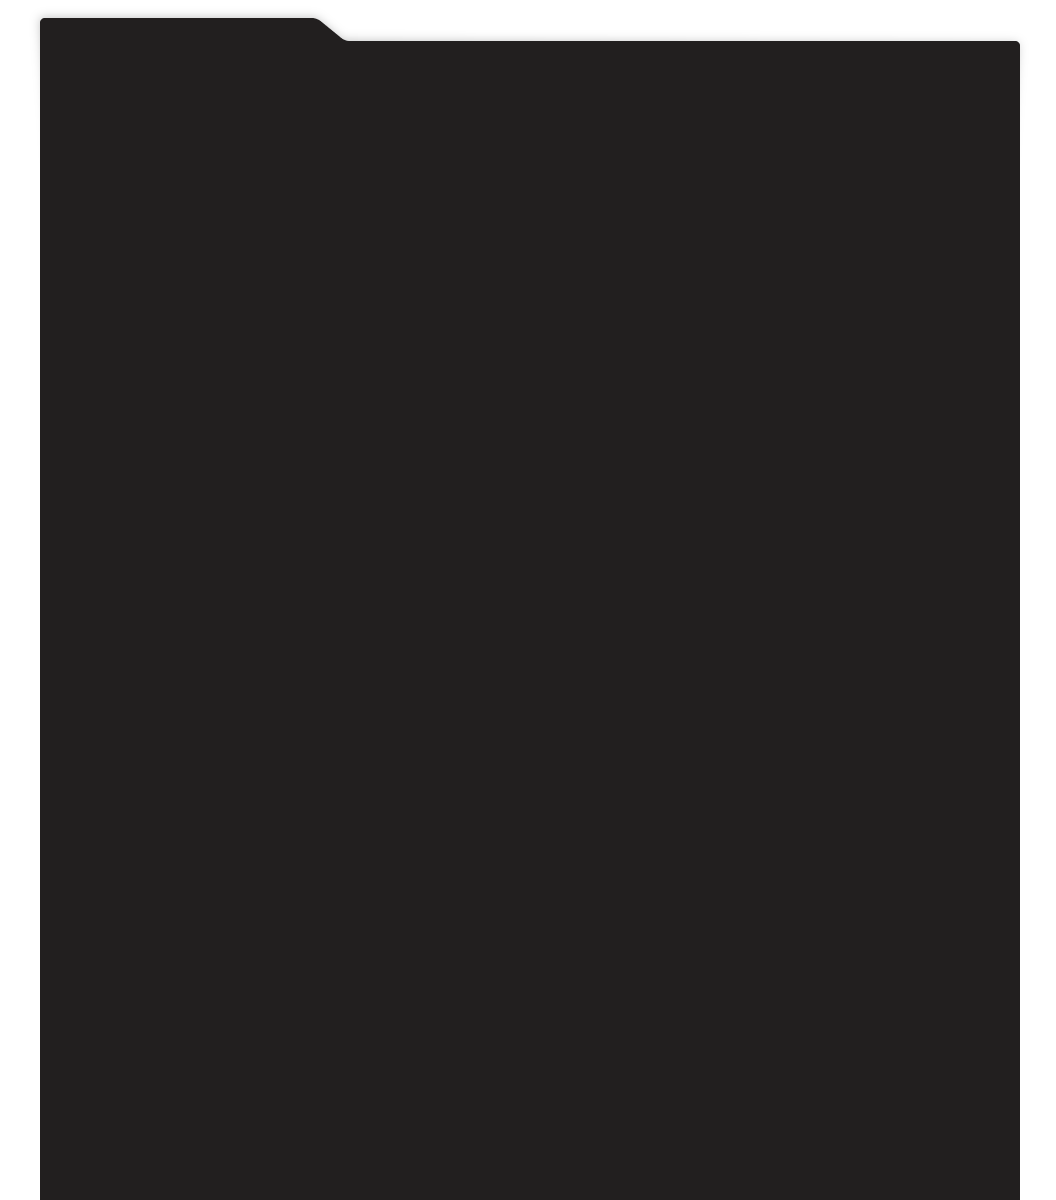
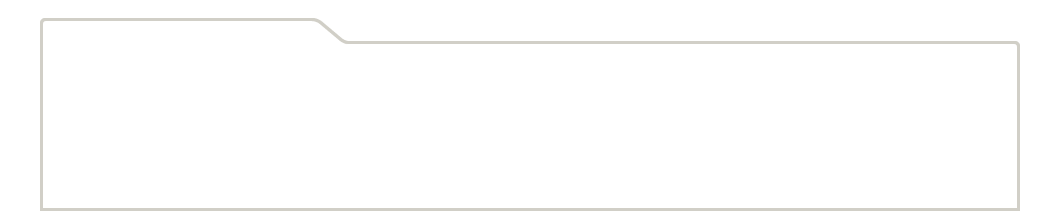
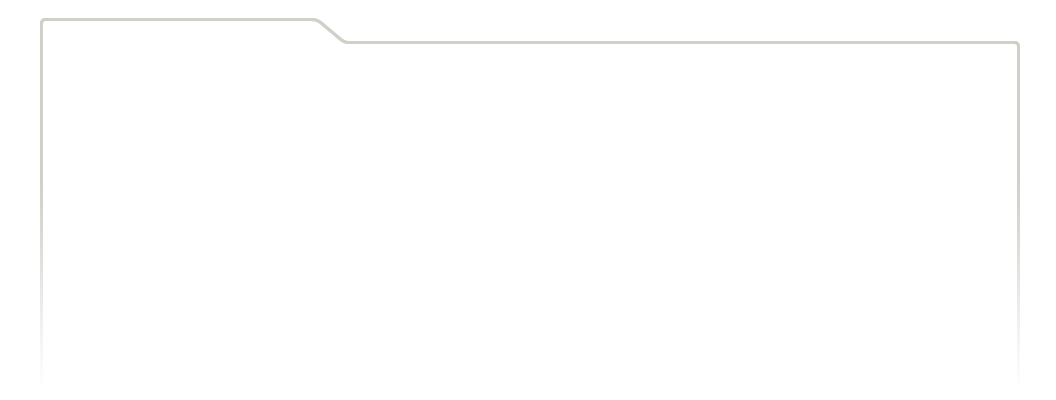
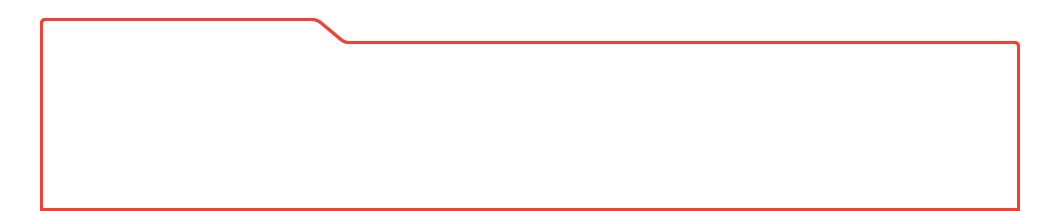
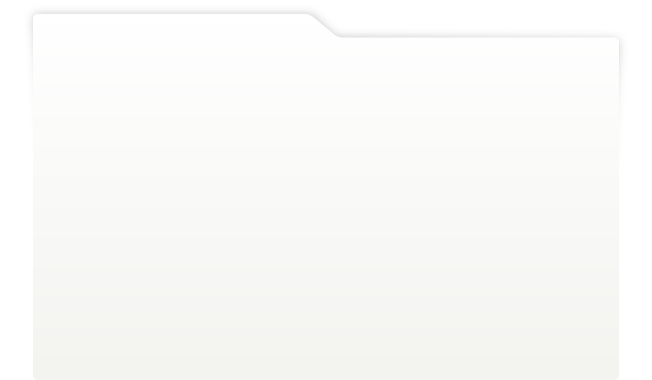
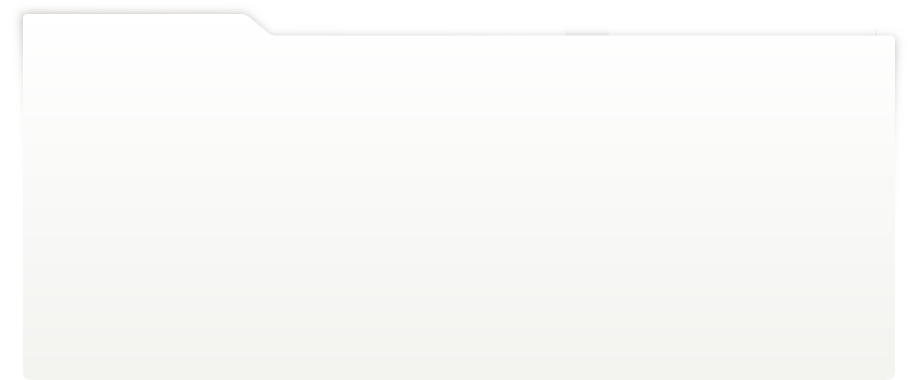
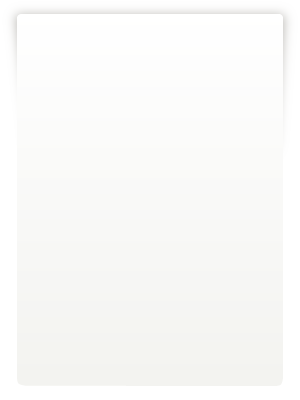
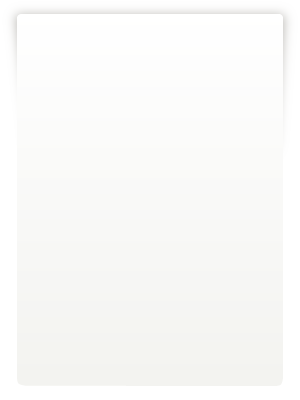
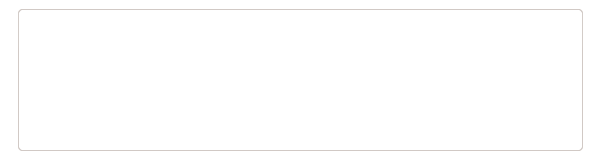
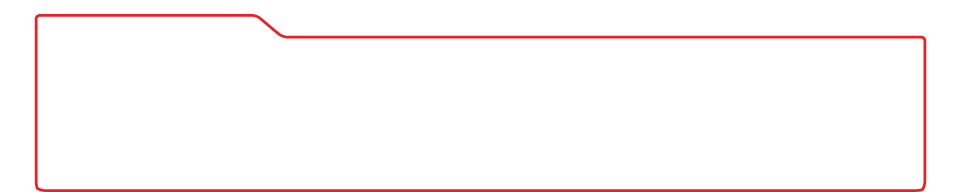
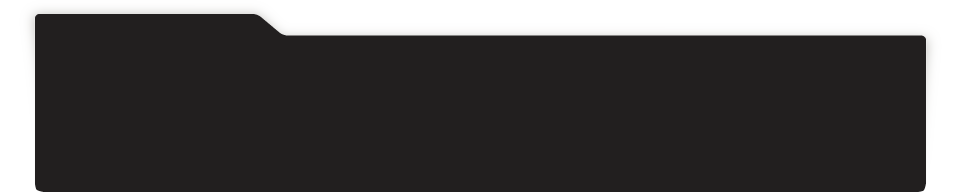
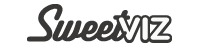
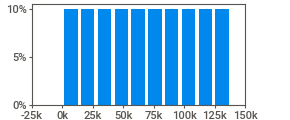
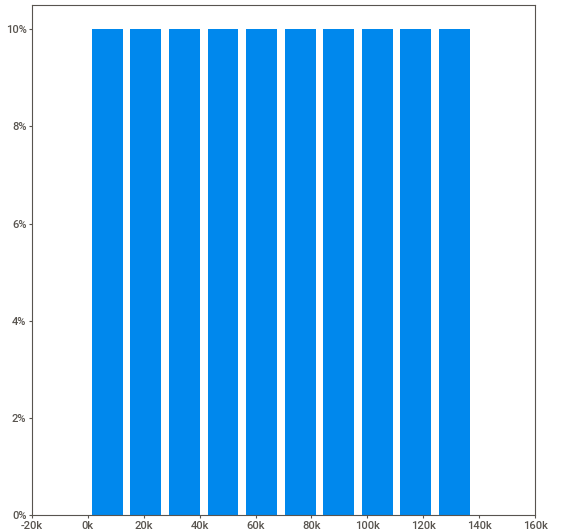
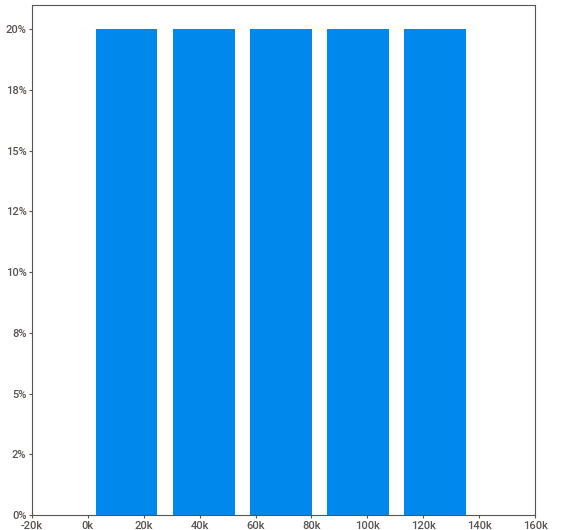
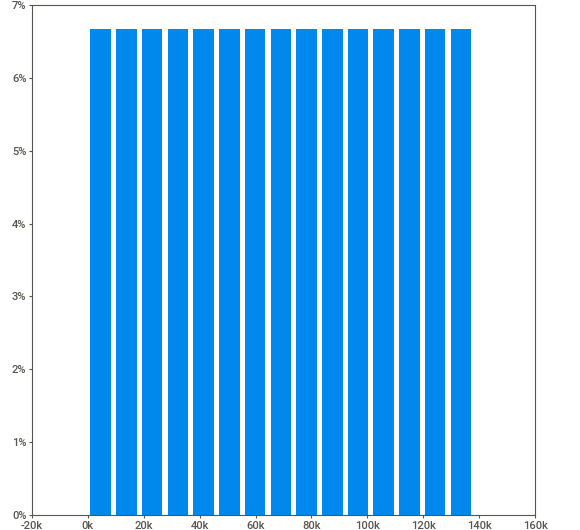
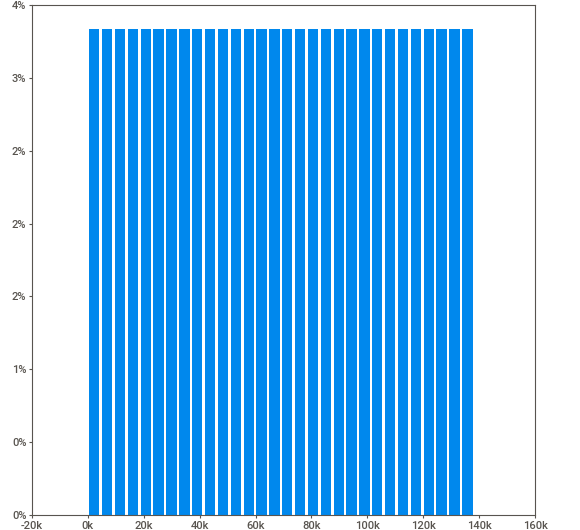
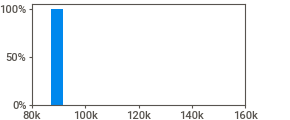
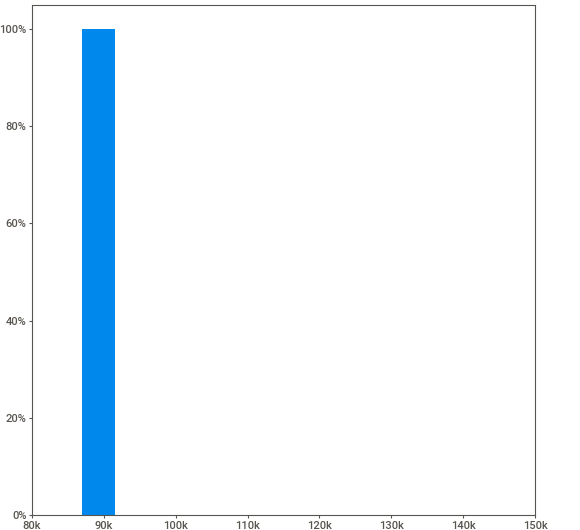
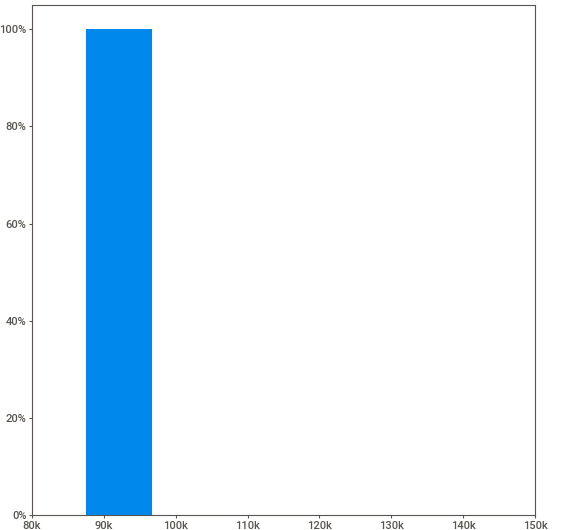
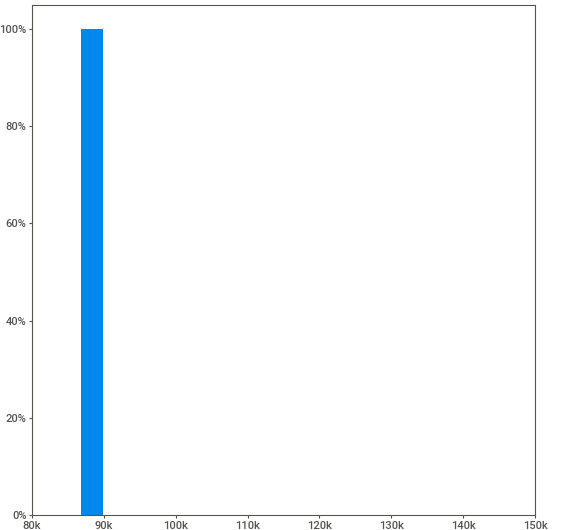
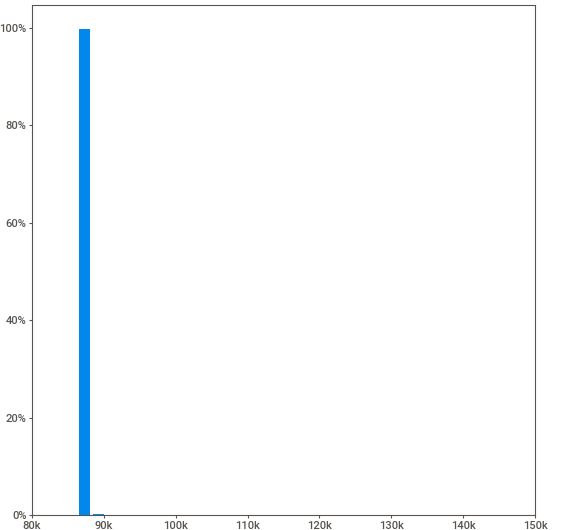
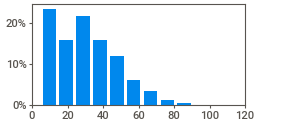
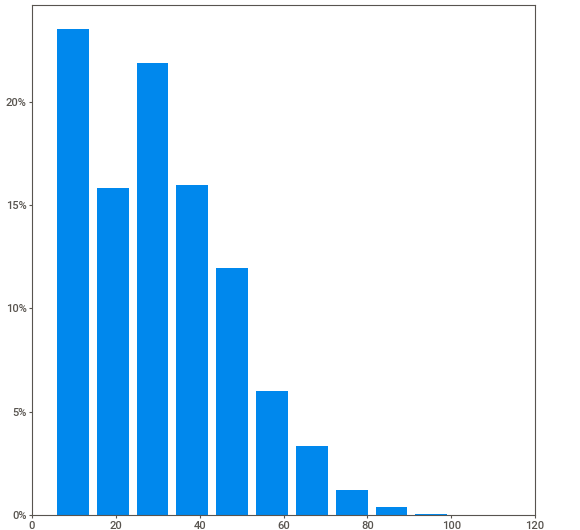
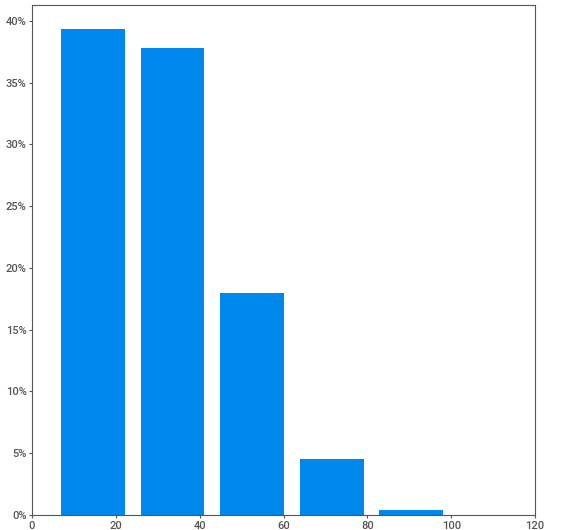
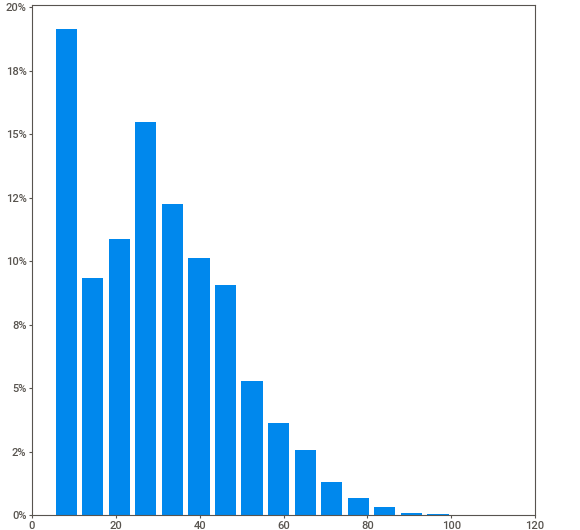
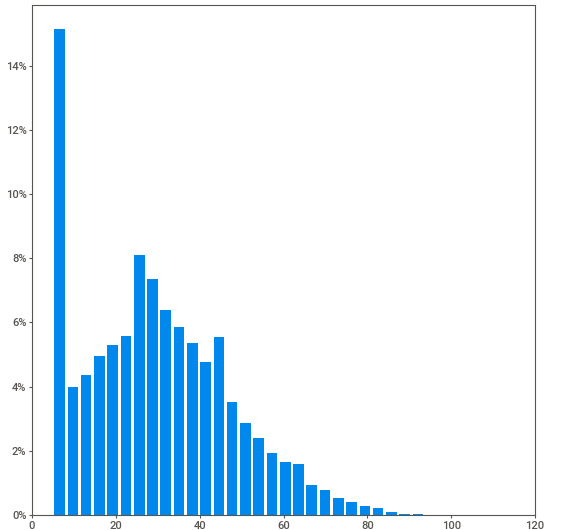
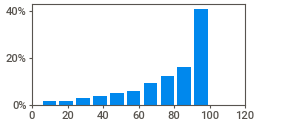
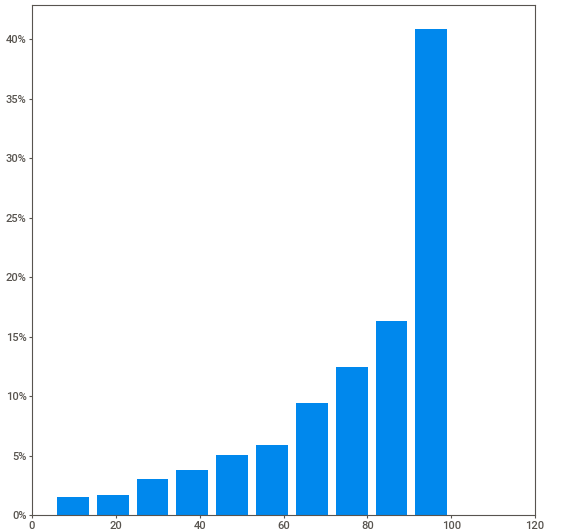
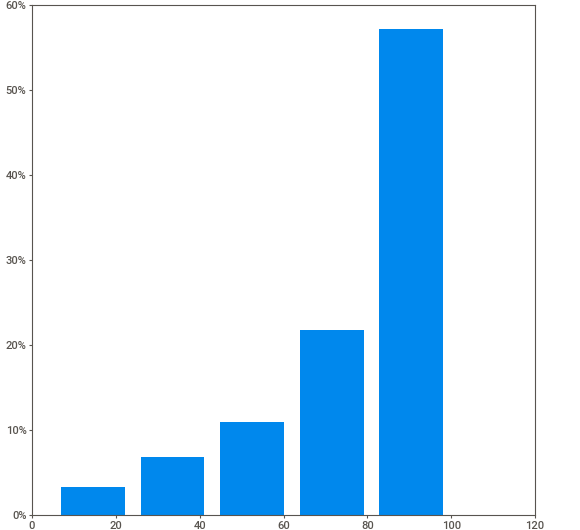
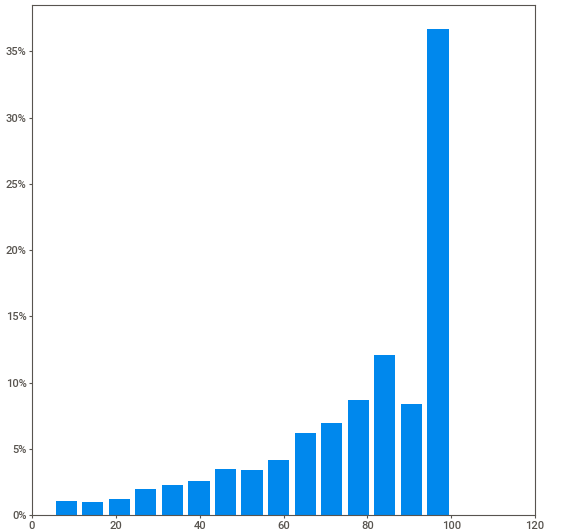
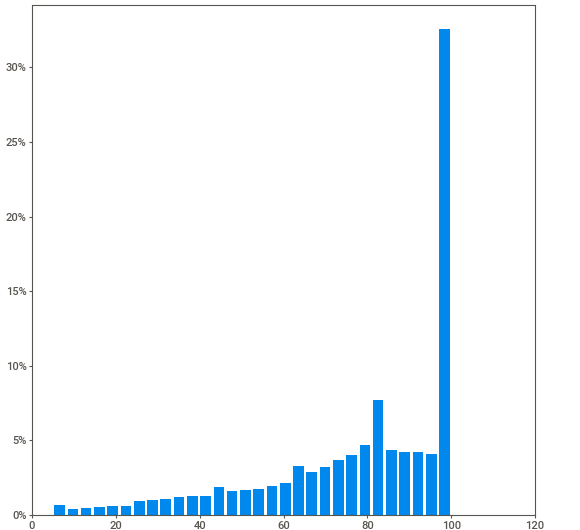
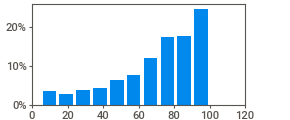
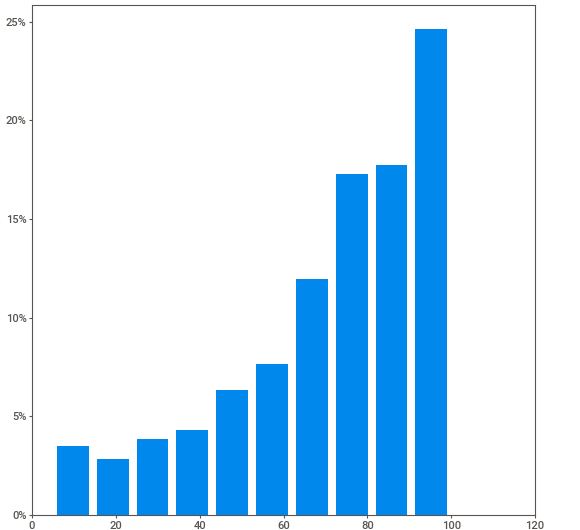
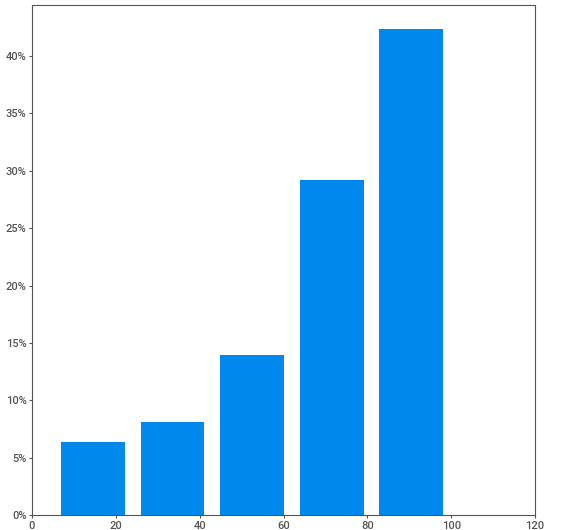
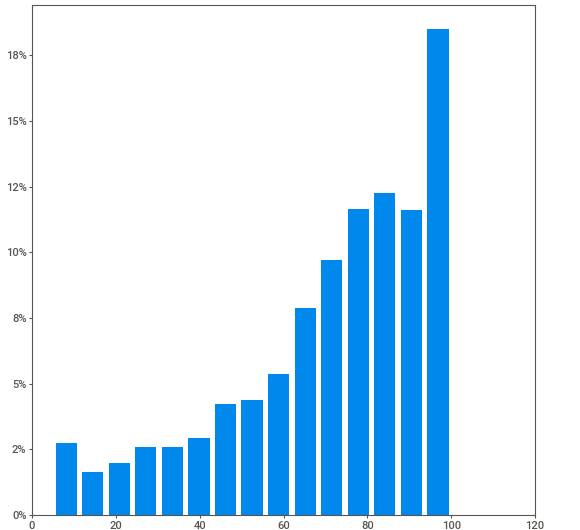
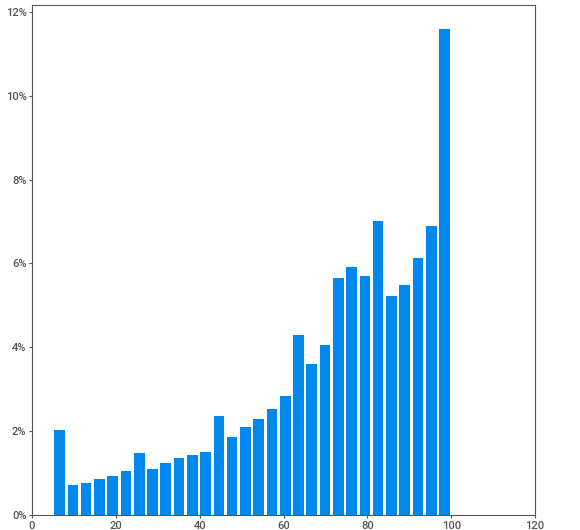
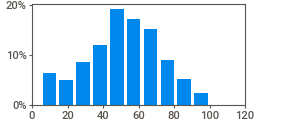
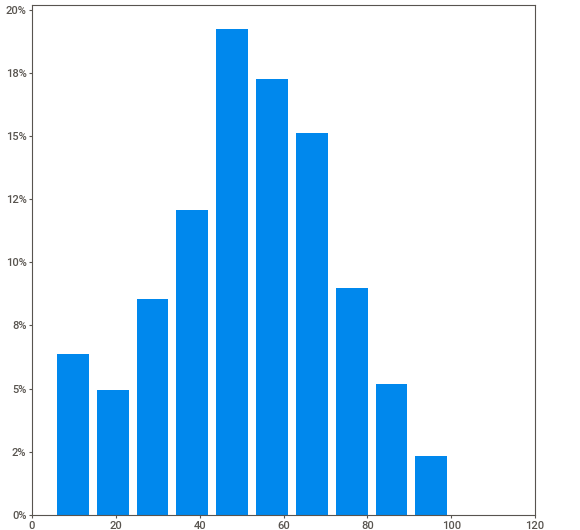
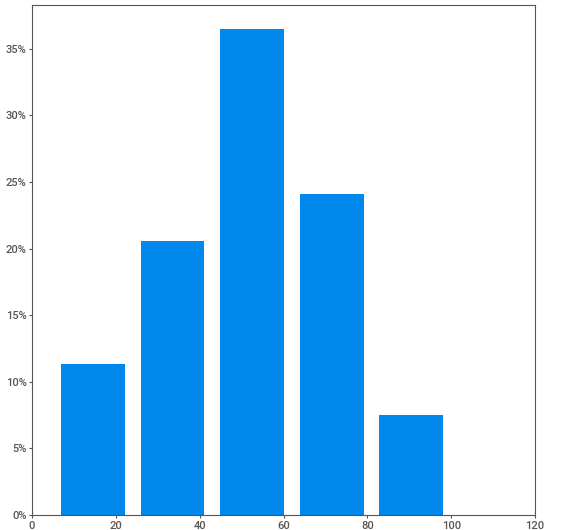
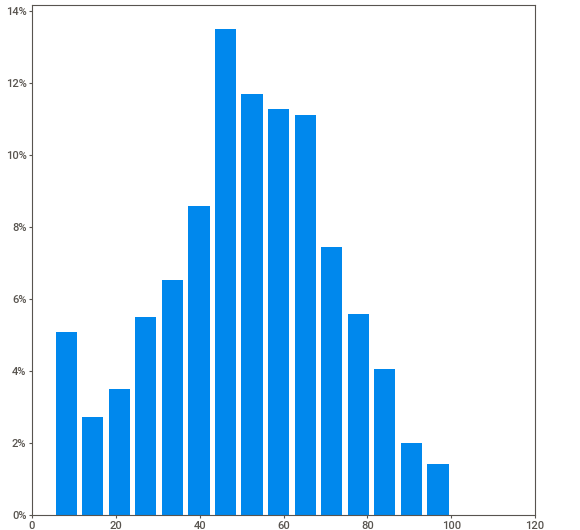
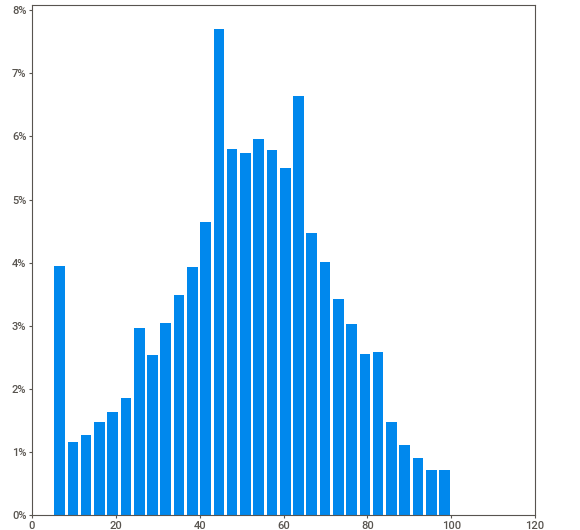
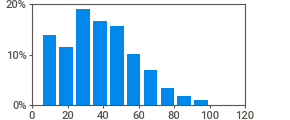
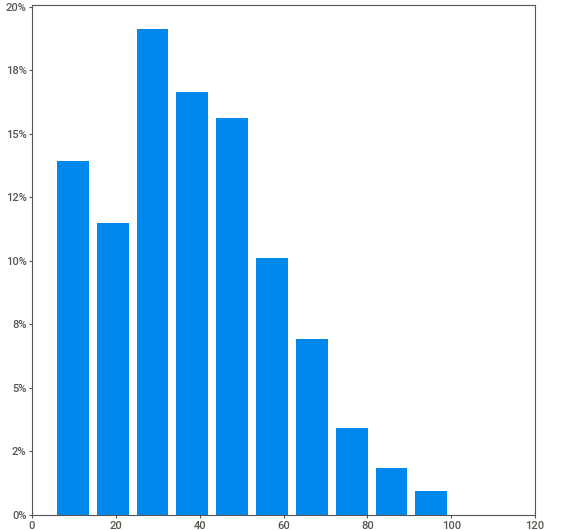
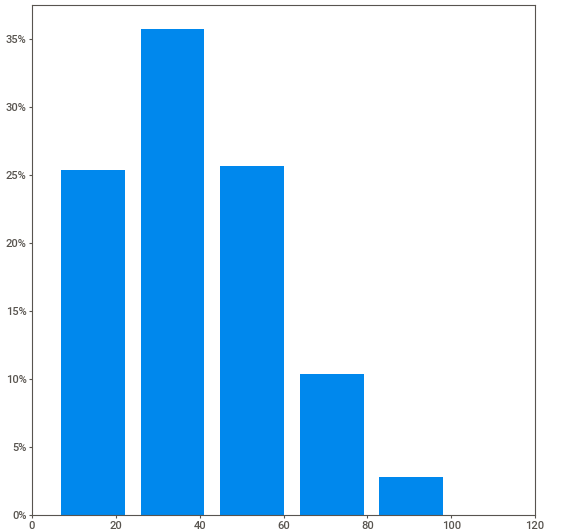
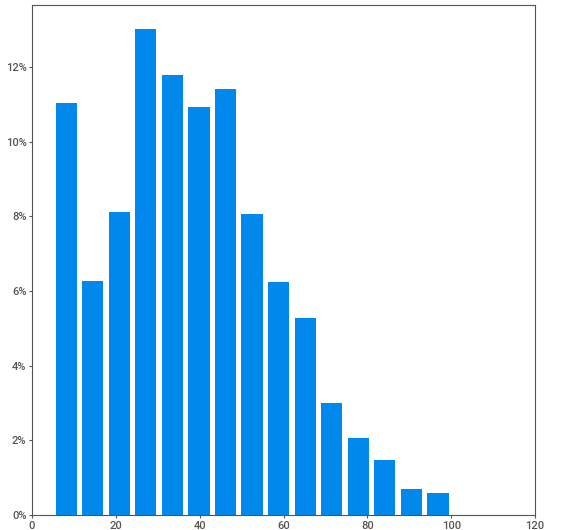
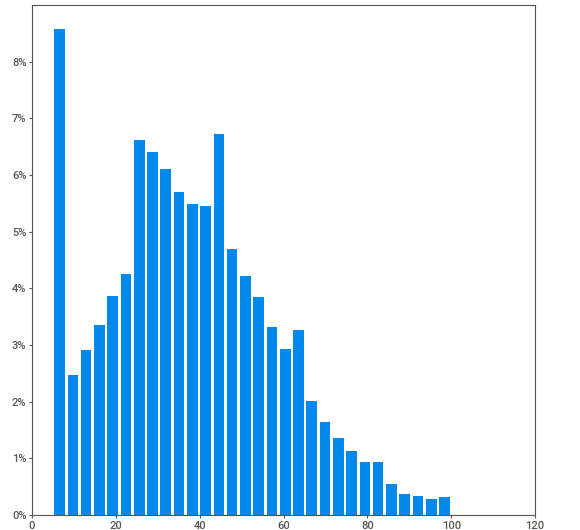
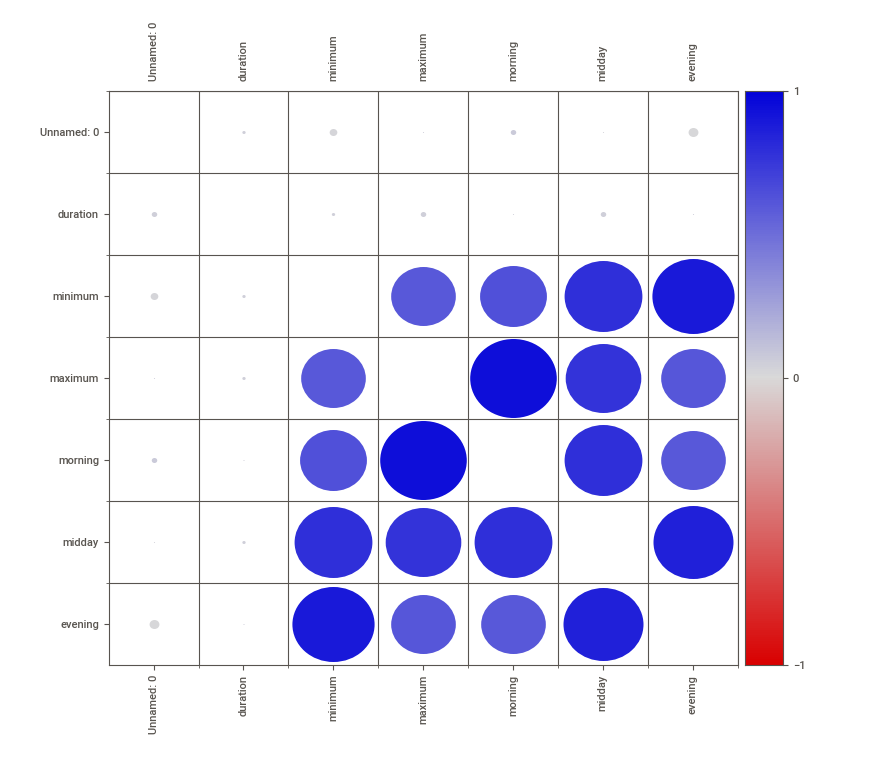
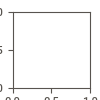

In [ ]:
my_report = sweetviz.analyze(df_body_battery)
my_report.show_notebook()

### Metrics Record

In [ ]:
# Results Metrics
print(df_results_metrics.shape)
print(df_results_metrics.dtypes)
#df_results_metrics.head()
df_results_metrics.describe().T


(34337, 6)
Unnamed: 0       int64
date            object
entry_time      object
user_id         object
vo2_max          int64
fitness_age    float64
dtype: object


count          mean          std  ...      50%      75%      max
Unnamed: 0   34337.0  17168.000000  9912.382433  ...  17168.0  25752.0  34336.0
vo2_max      34337.0     43.478230     7.956048  ...     43.0     49.0     75.0
fitness_age  33997.0     30.692591    16.464468  ...     20.0     42.0     79.0

[3 rows x 8 columns]

#### Sweetviz Report

                                             |          | [  0%]   00:00 -> (? left)


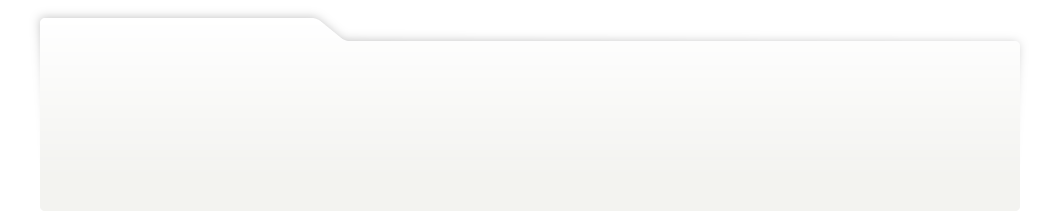
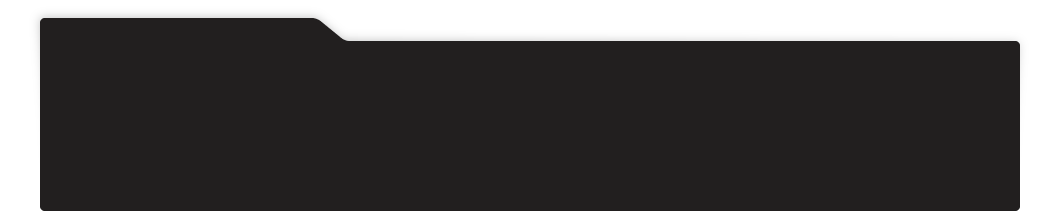
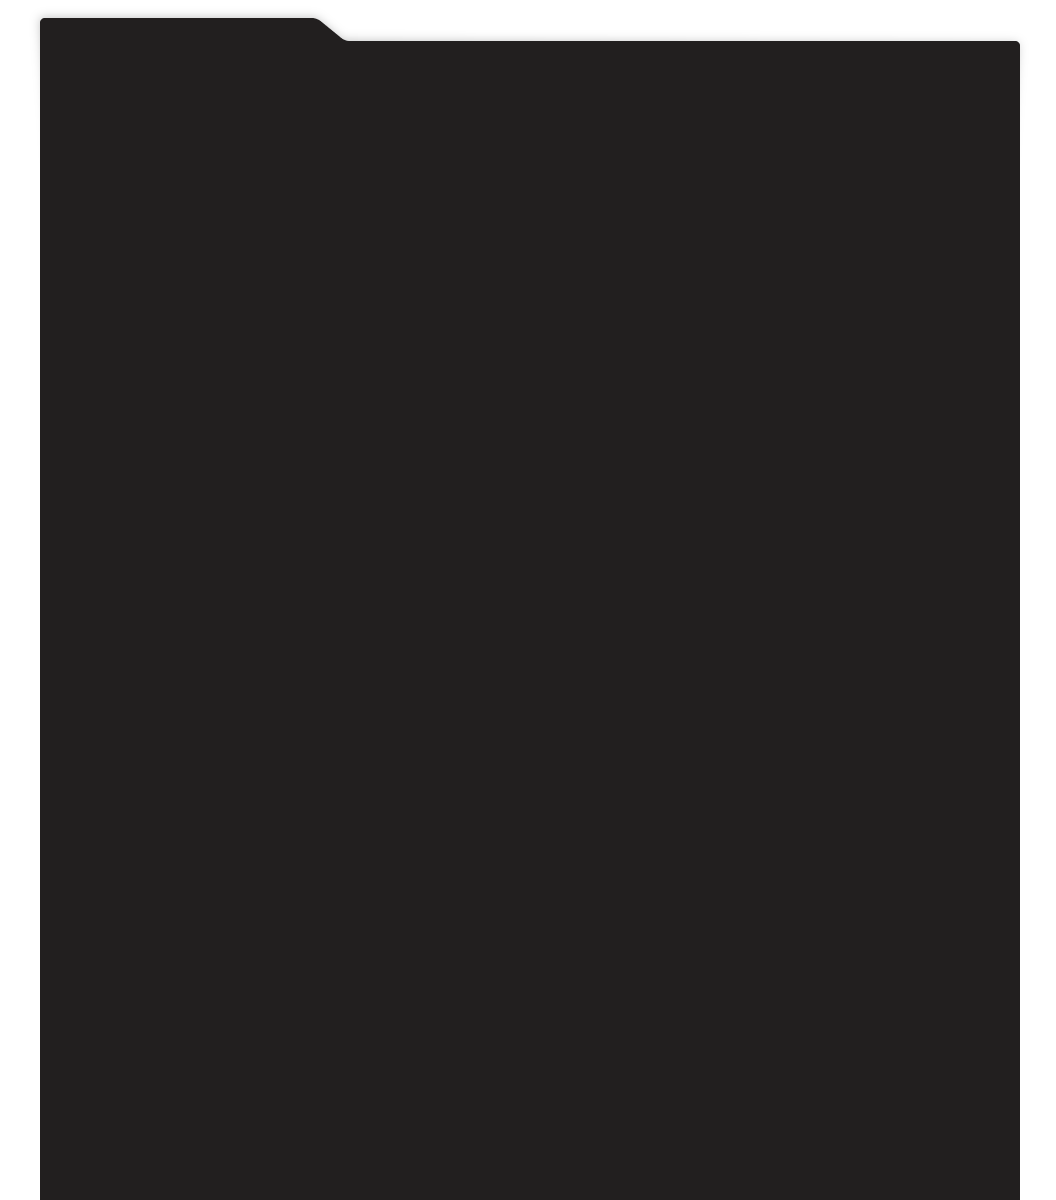
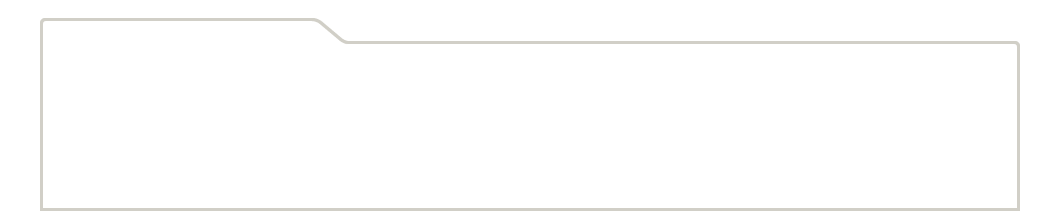
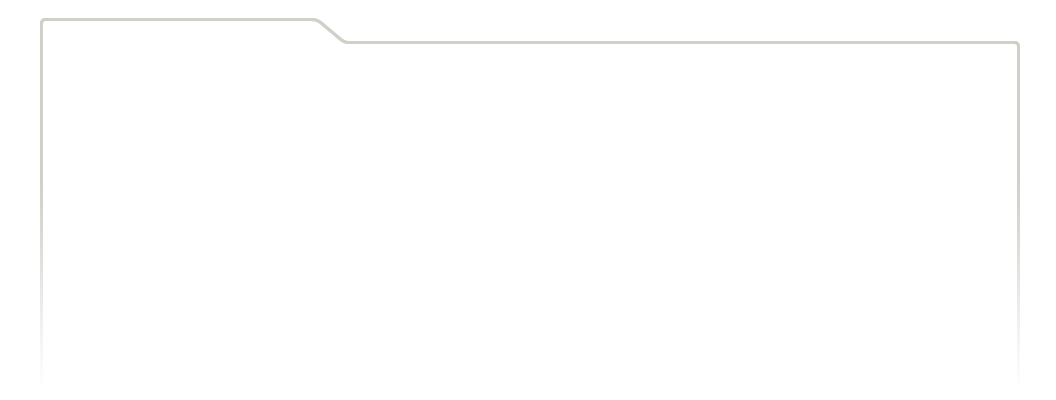
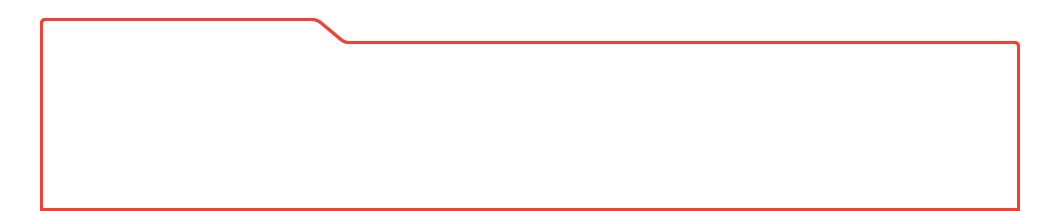
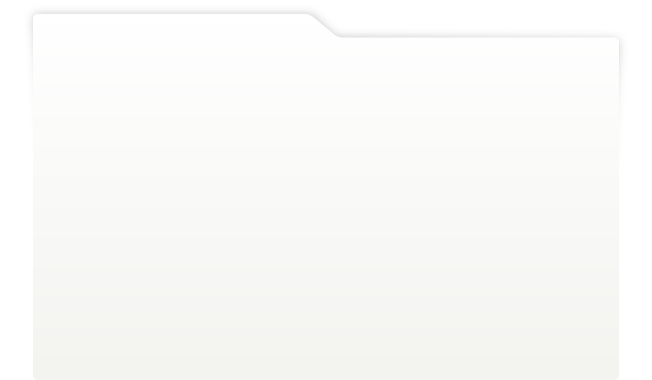
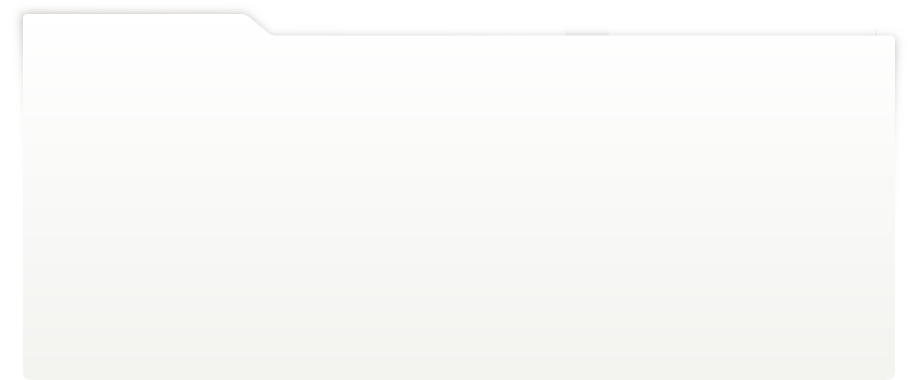
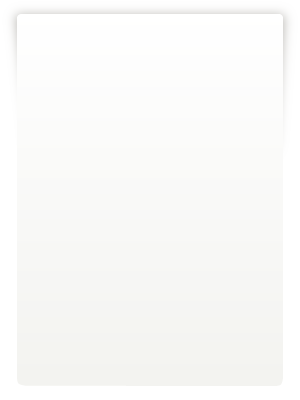
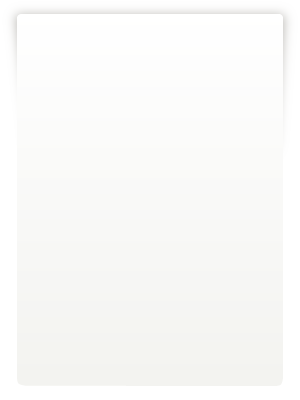
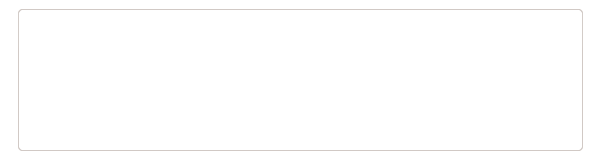
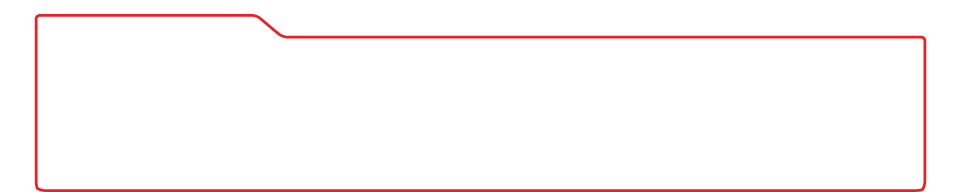
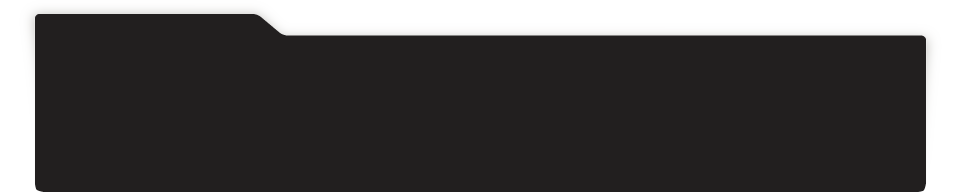
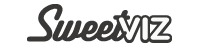
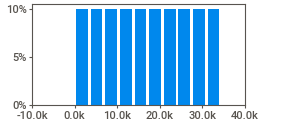
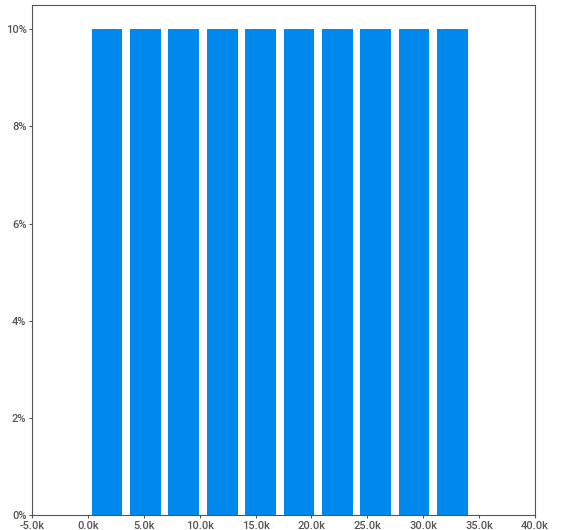
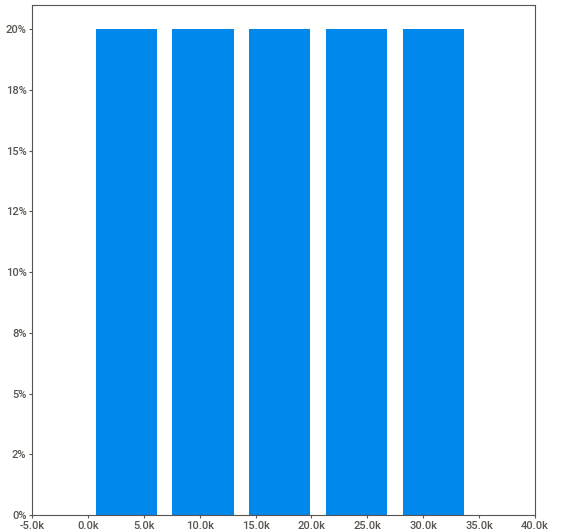
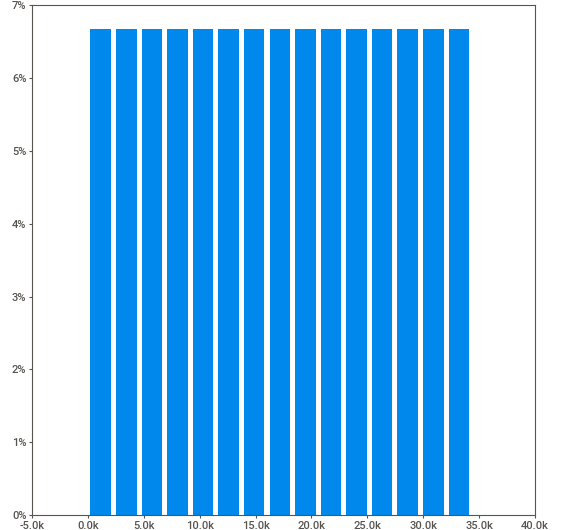
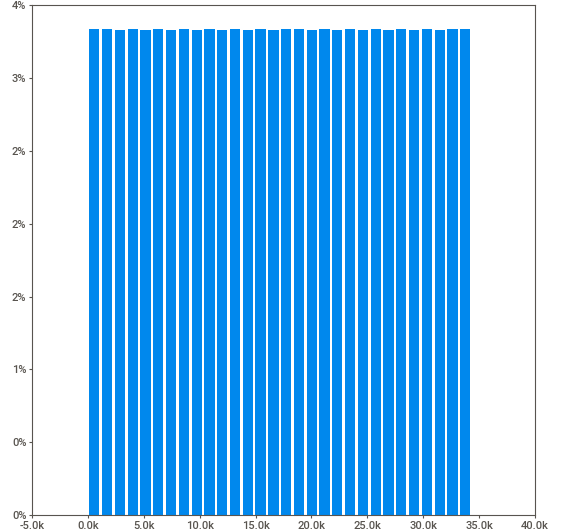
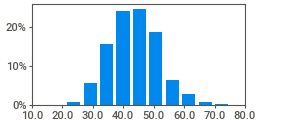
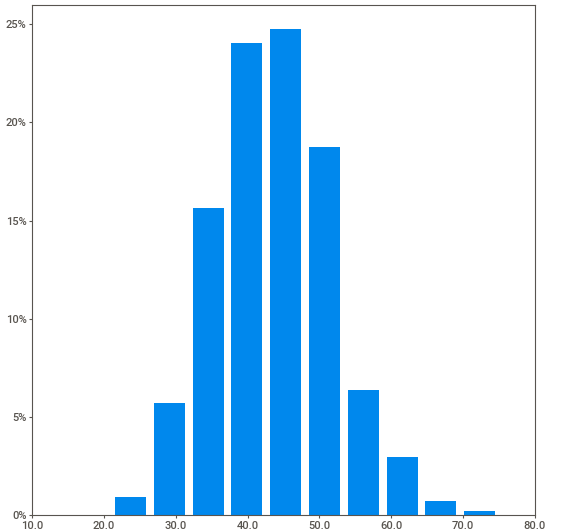
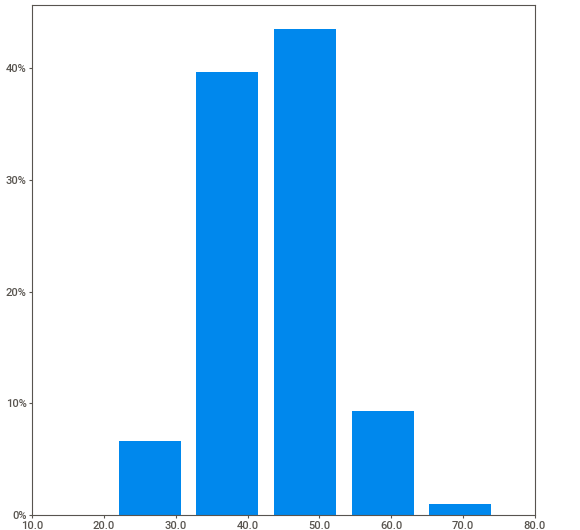
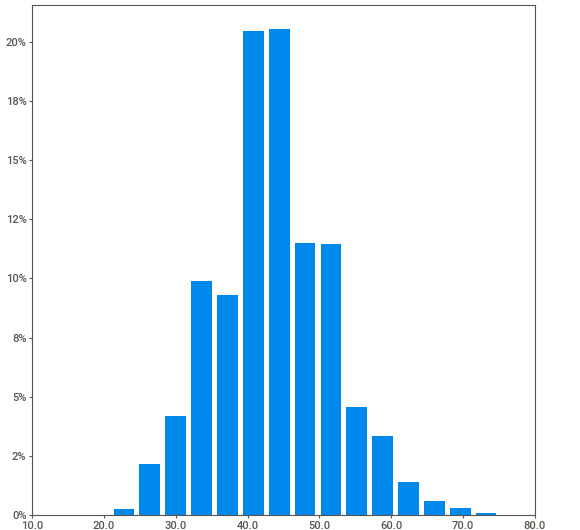
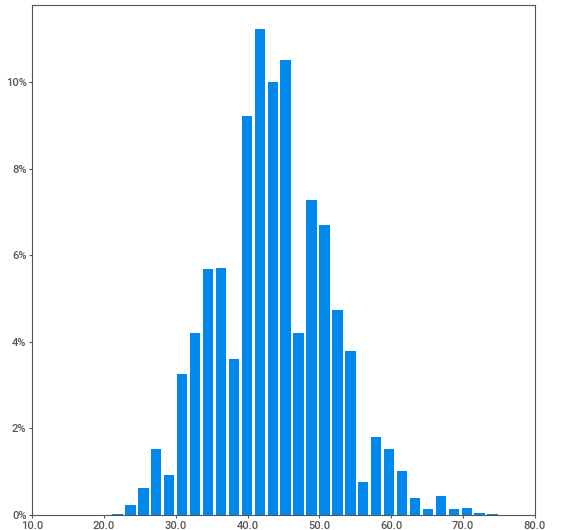
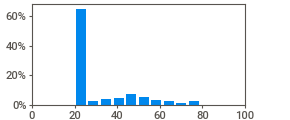
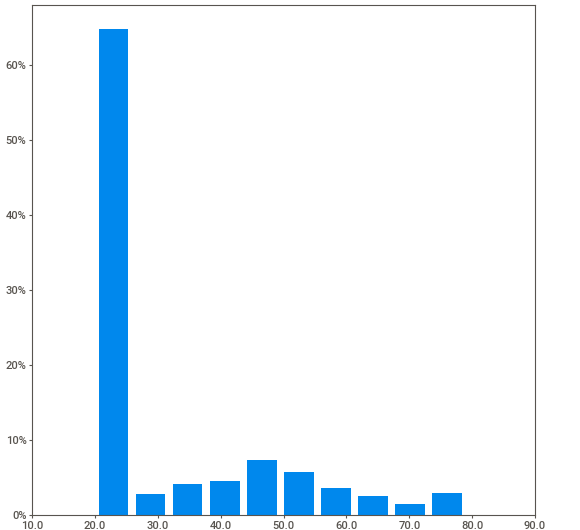
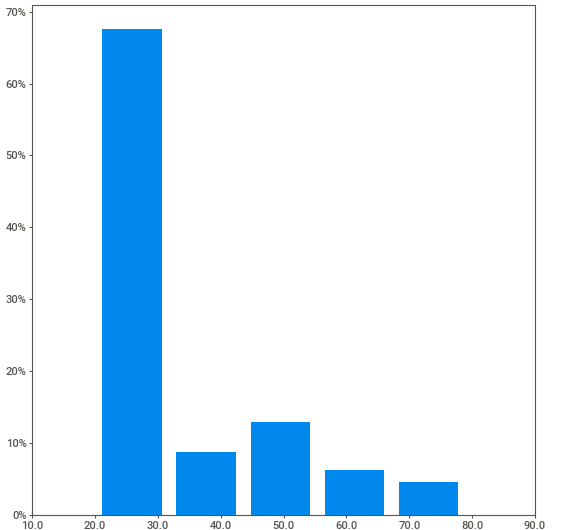
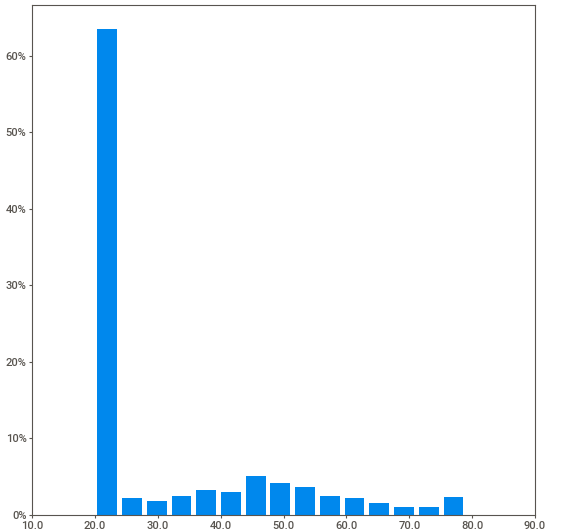
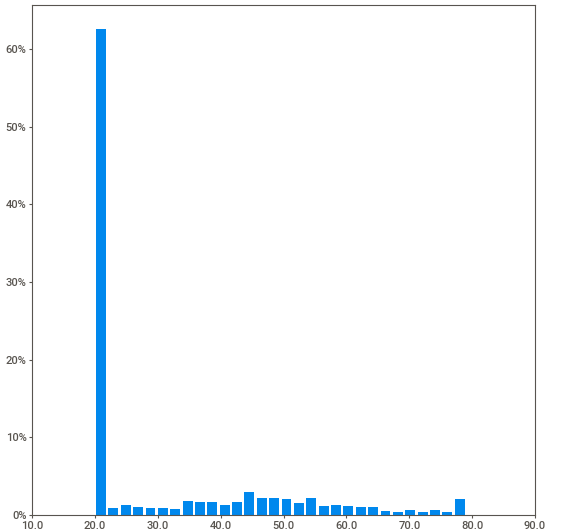
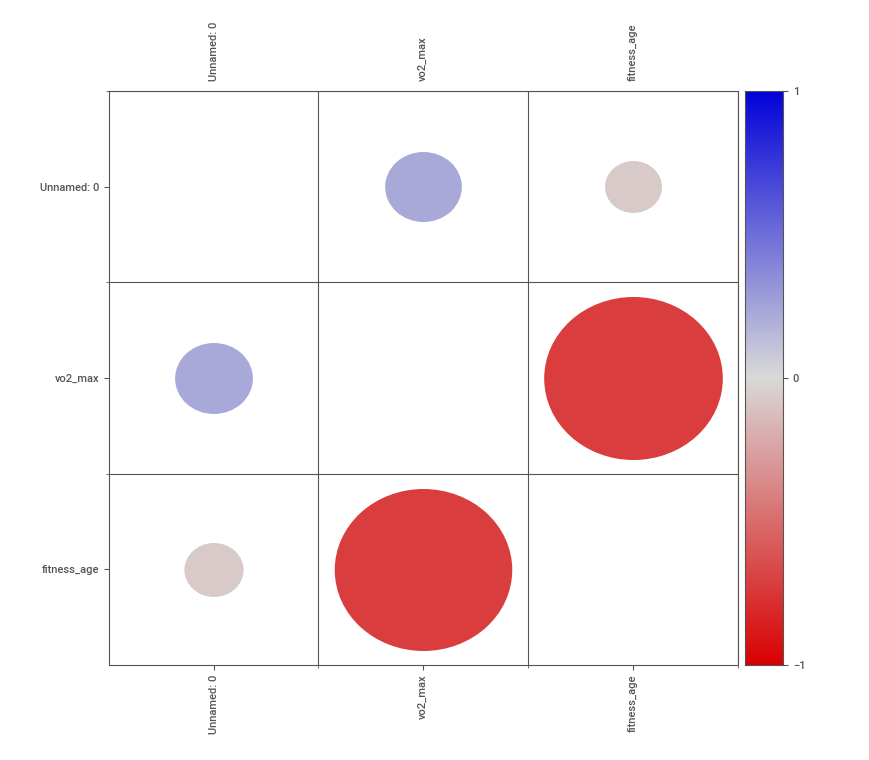
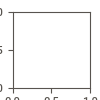

In [ ]:
my_report = sweetviz.analyze(df_results_metrics)
my_report.show_notebook()

### Sleep Record

In [ ]:
# Sleep Records
print(df_sleep_records.shape)
print(df_sleep_records.dtypes)
#df_sleep_records.head()
df_sleep_records.describe().T

(401485, 10)
Unnamed: 0         int64
date              object
entry_time        object
user_id           object
total_hours      float64
quality_hours    float64
spo2_minimum     float64
spo2_average     float64
deep_hours       float64
rem_hours        float64
dtype: object


count           mean  ...        75%        max
Unnamed: 0     401485.0  200742.000000  ...  301113.00  401484.00
total_hours    401485.0       7.640113  ...       8.67      27.97
quality_hours  401485.0       3.013315  ...       3.60      15.17
spo2_minimum   271861.0      84.359599  ...      87.00     100.00
spo2_average   271861.0      92.142159  ...      93.81     100.00
deep_hours     162019.0       1.678932  ...       2.30      11.80
rem_hours      162019.0       1.286516  ...       2.15       9.10

[7 rows x 8 columns]

#### Sweetviz Report

                                             |          | [  0%]   00:00 -> (? left)


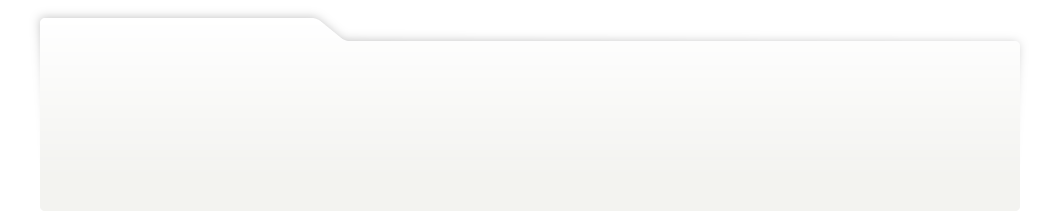
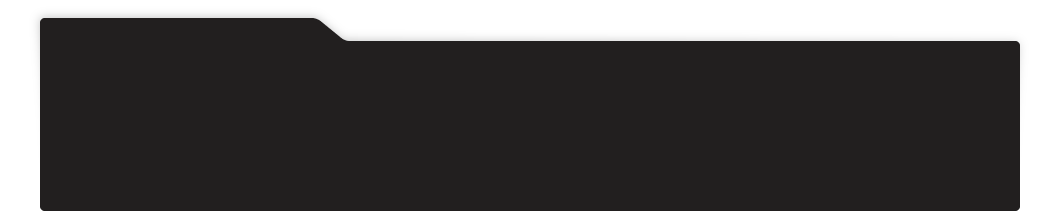
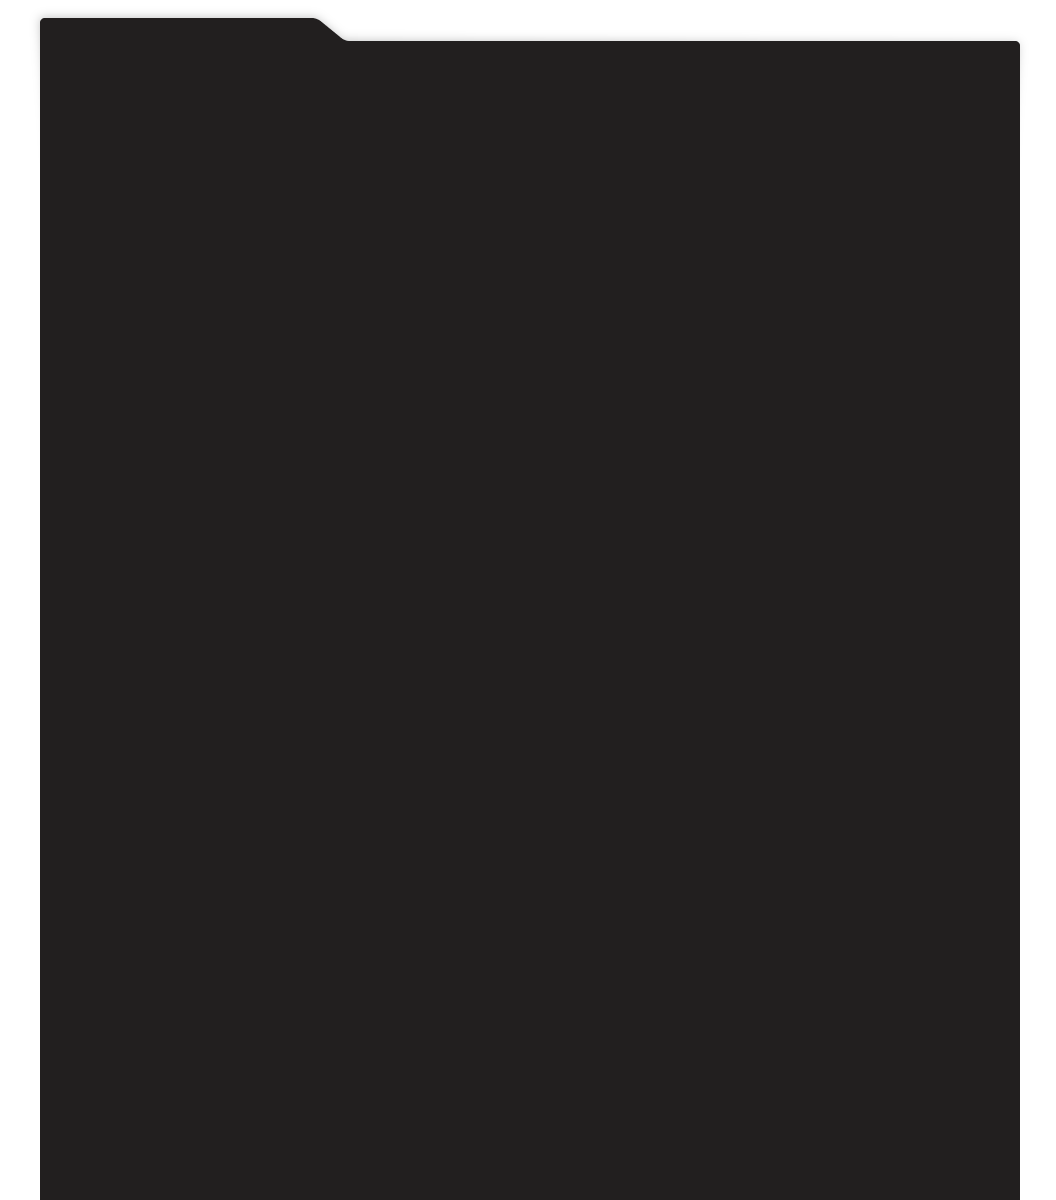
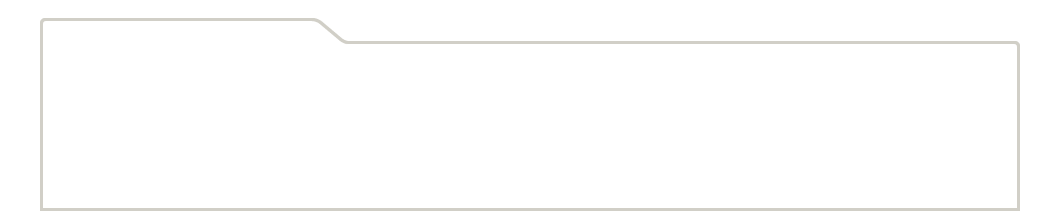
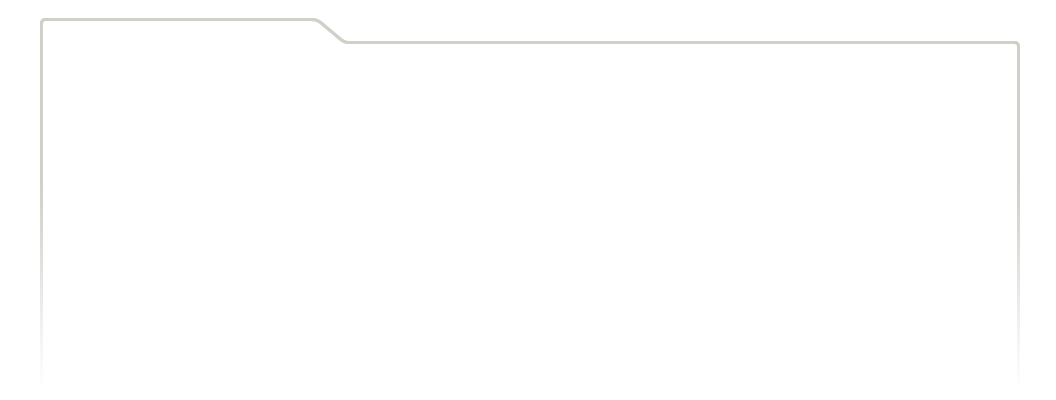
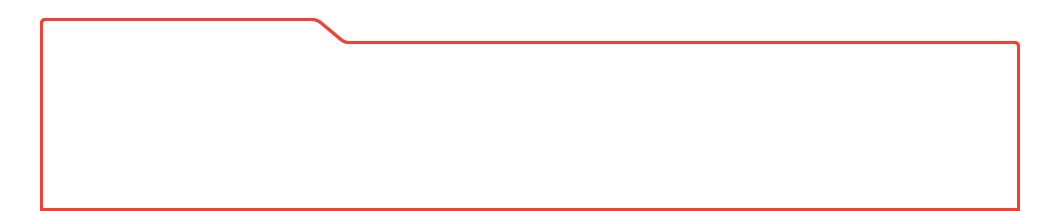
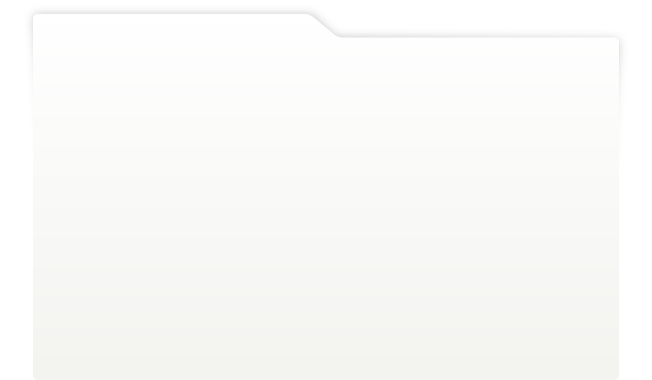
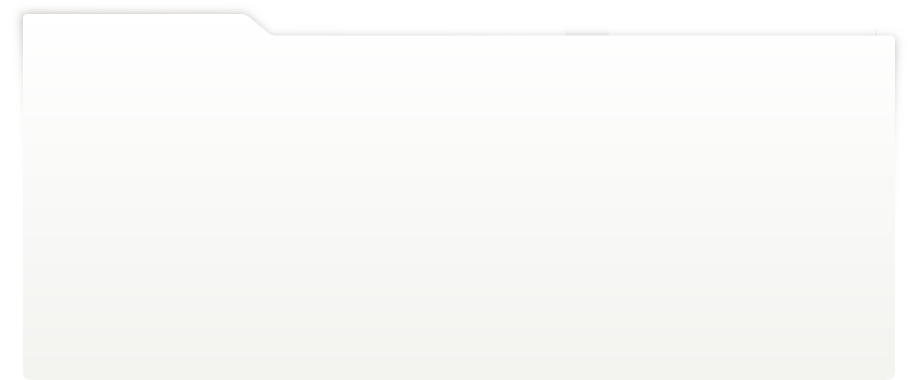
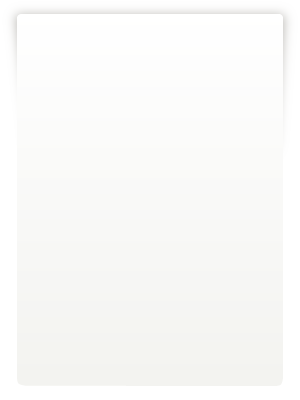
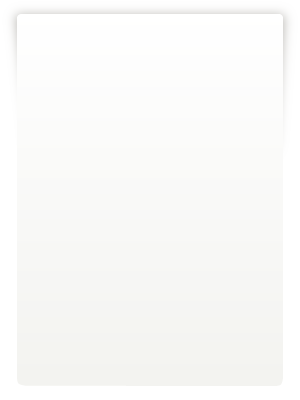
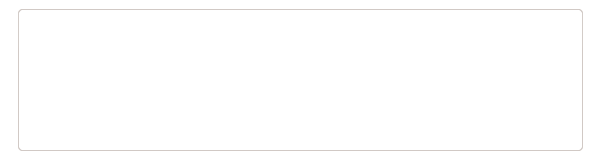
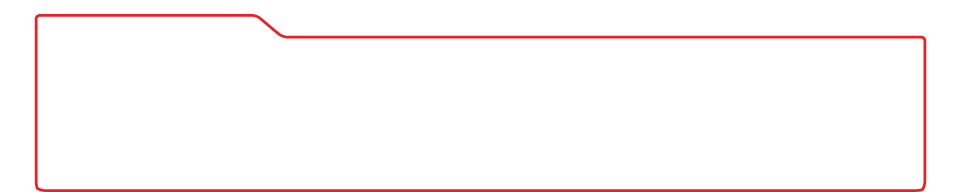
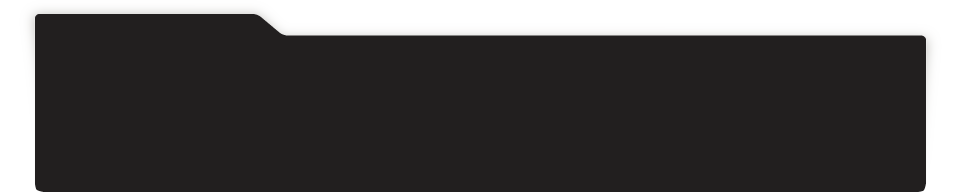
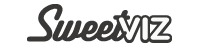
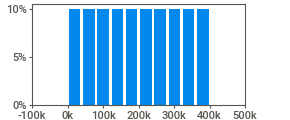
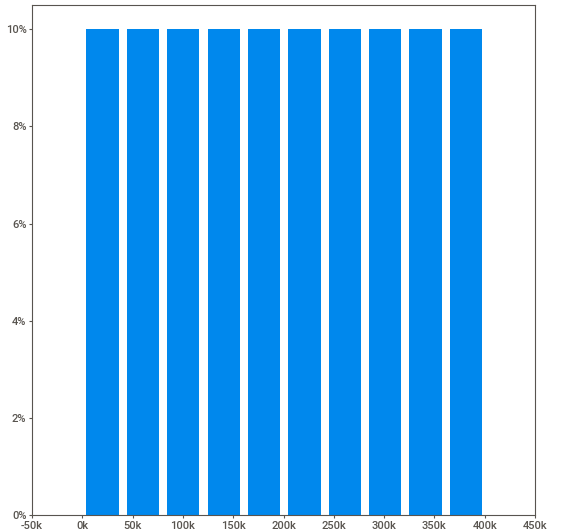
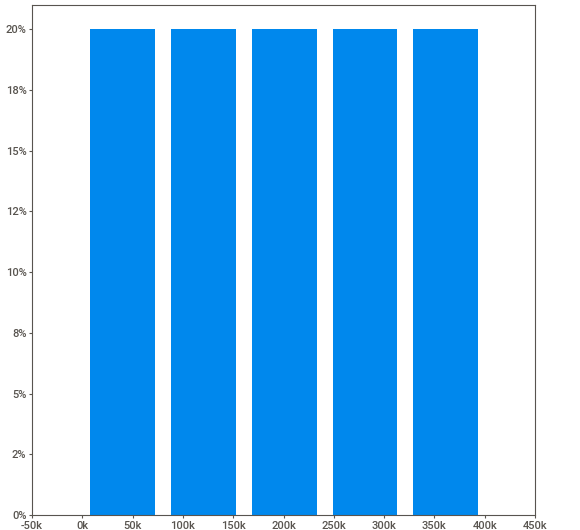
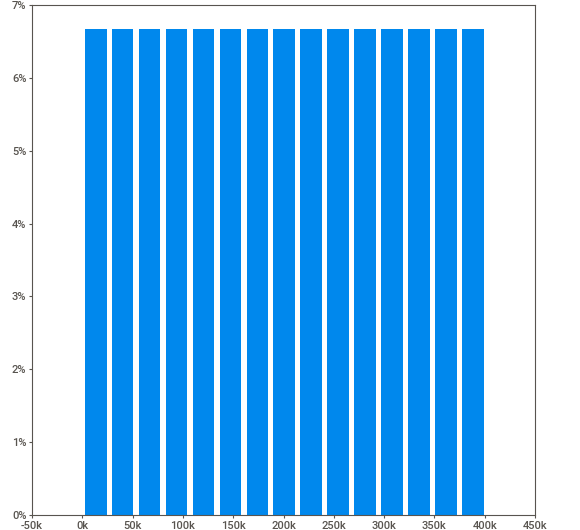
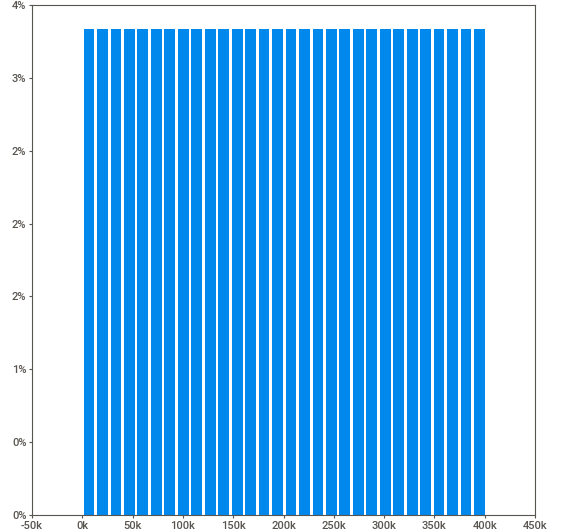
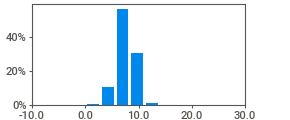
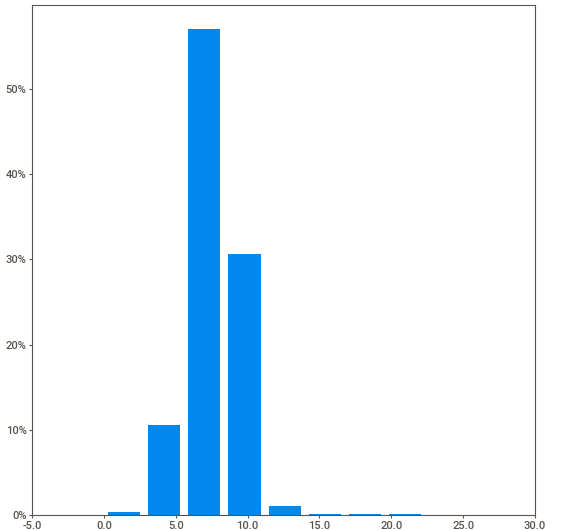
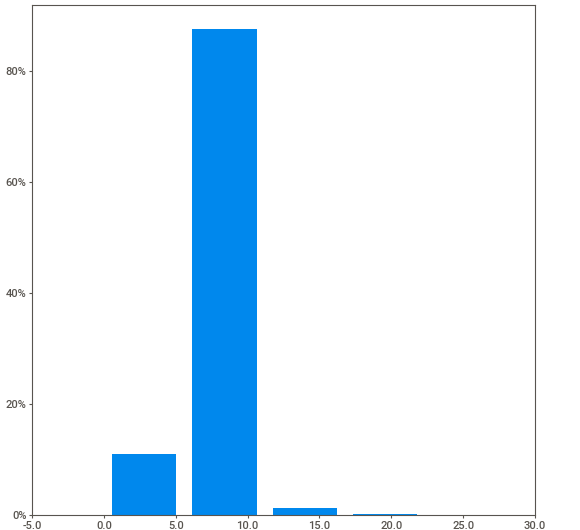
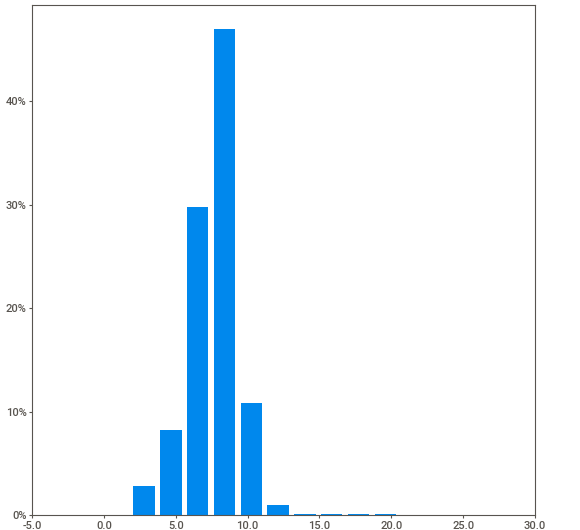
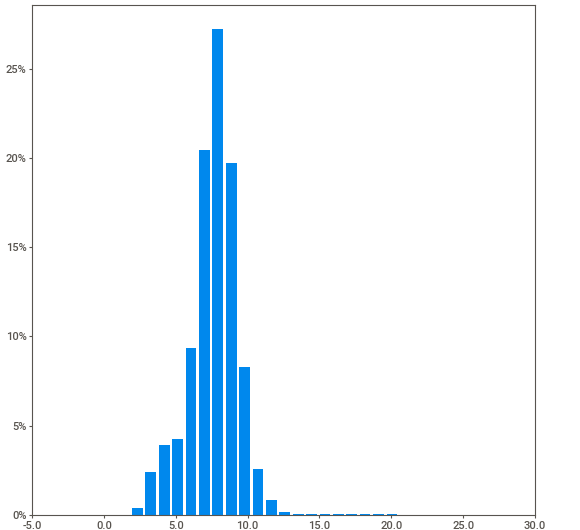
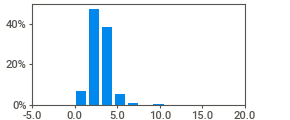
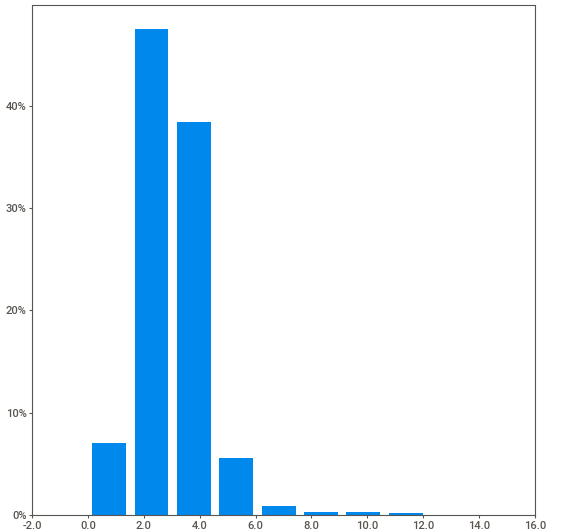
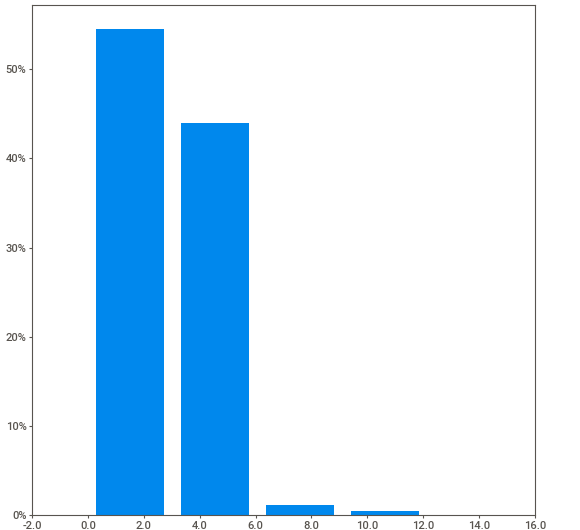
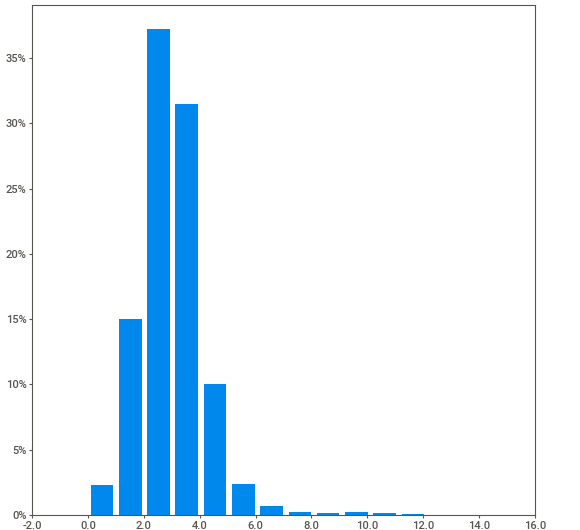
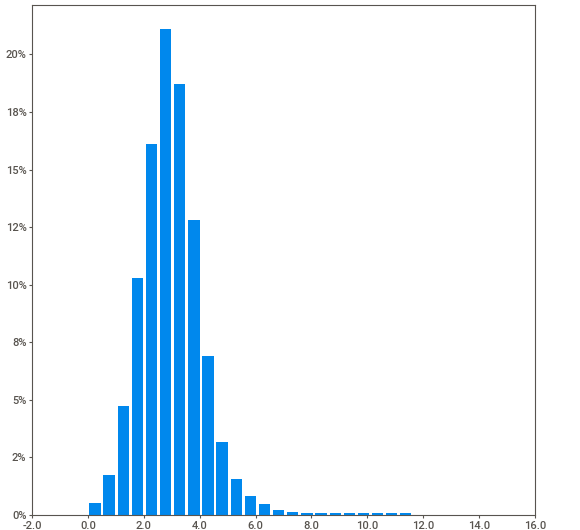
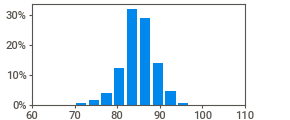
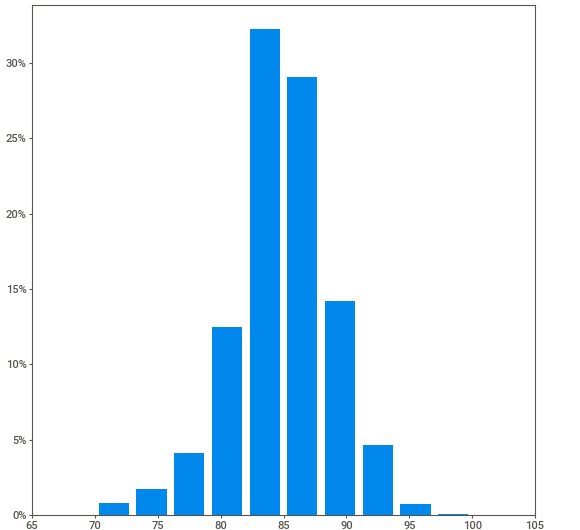
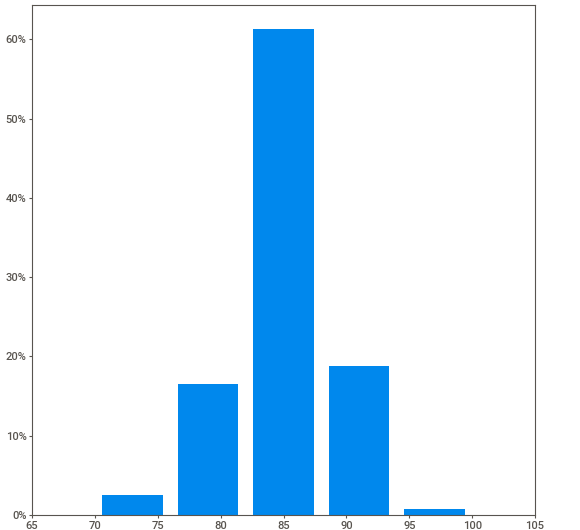
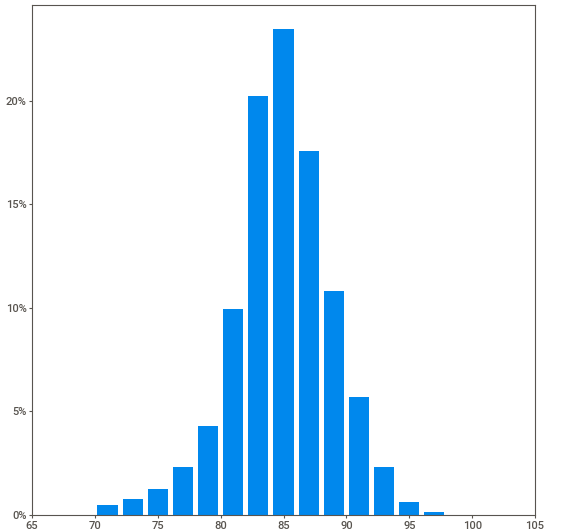
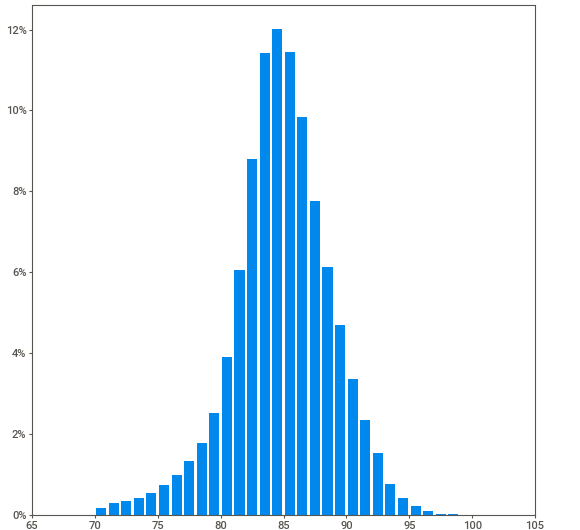
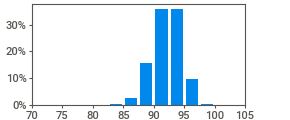
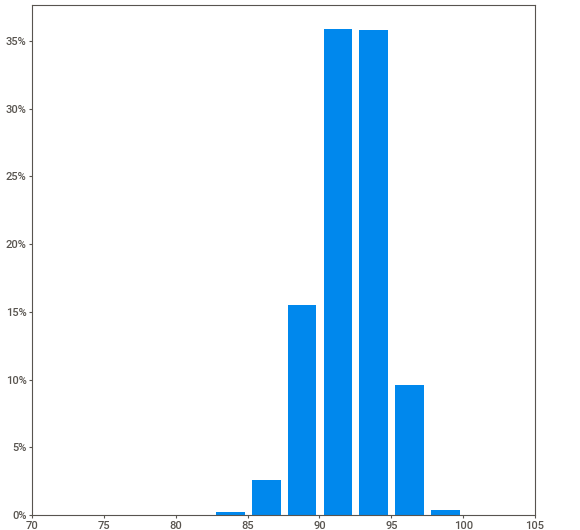
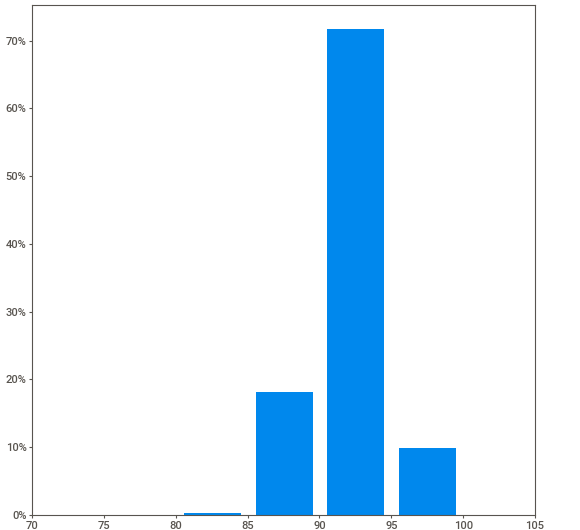
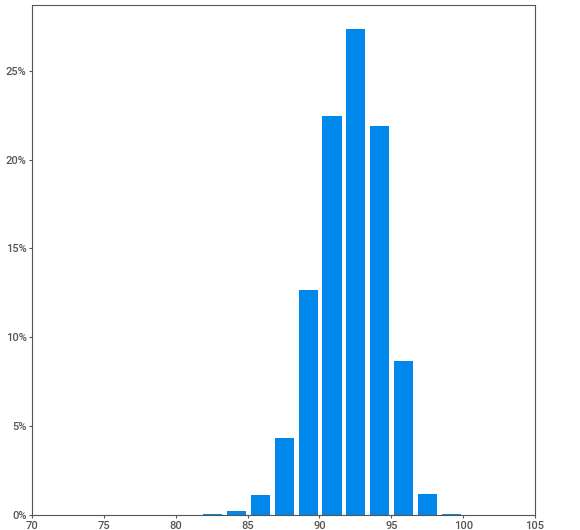
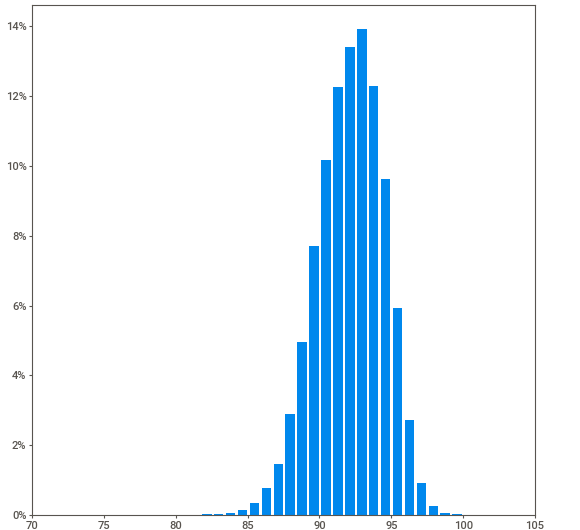
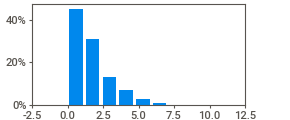
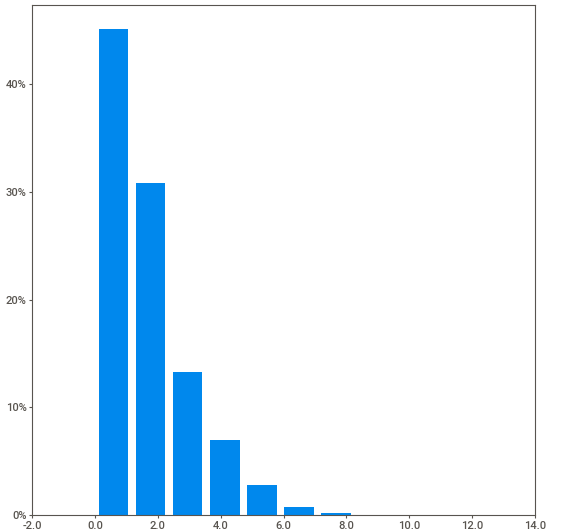
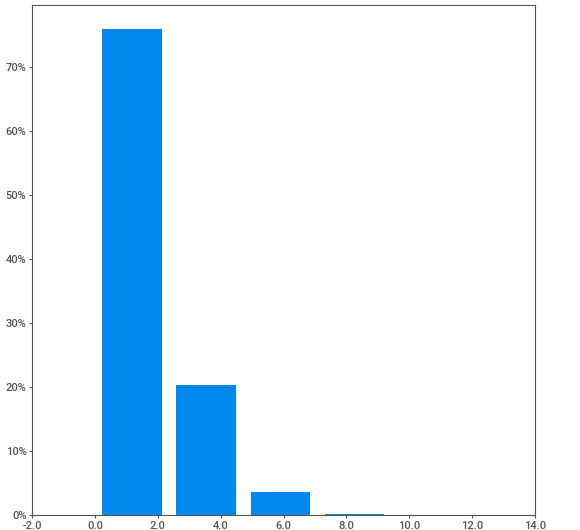
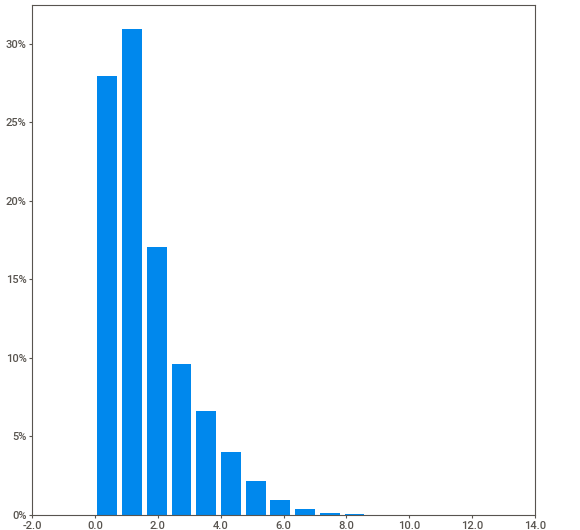
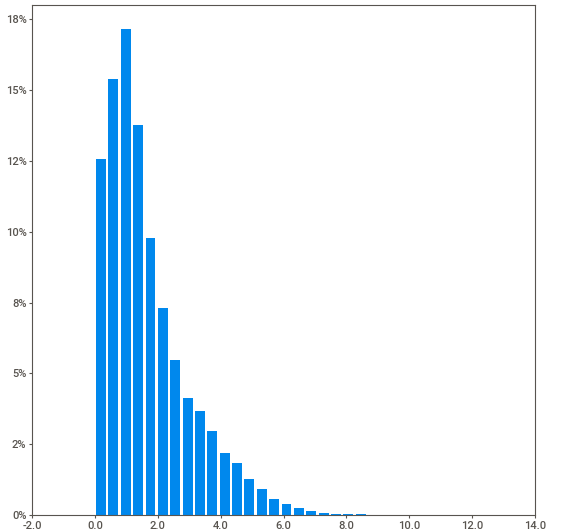
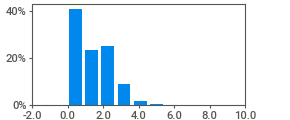
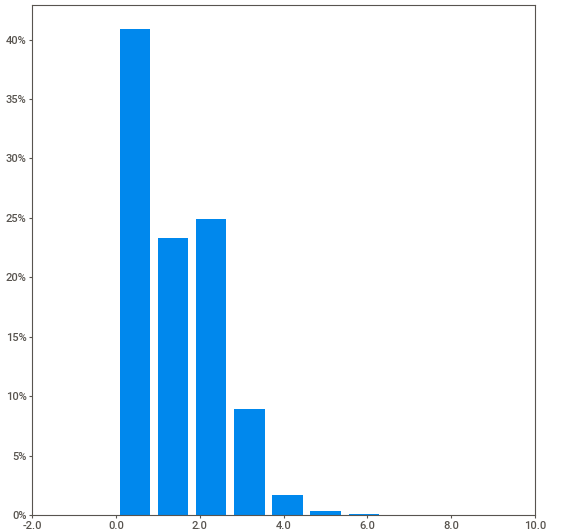
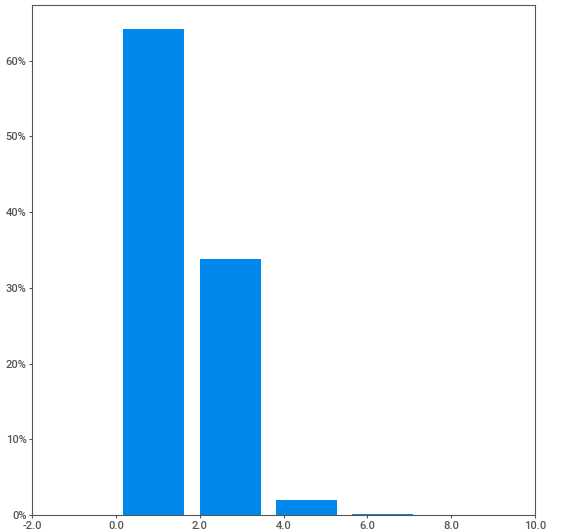
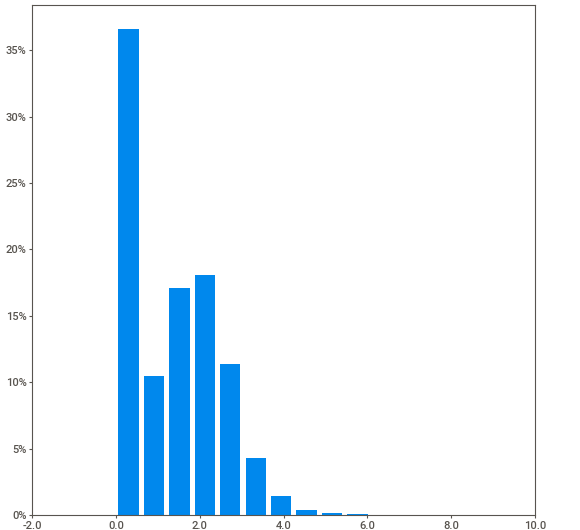
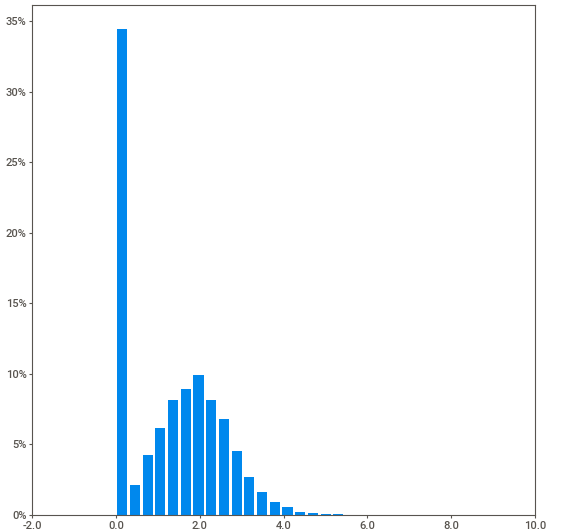
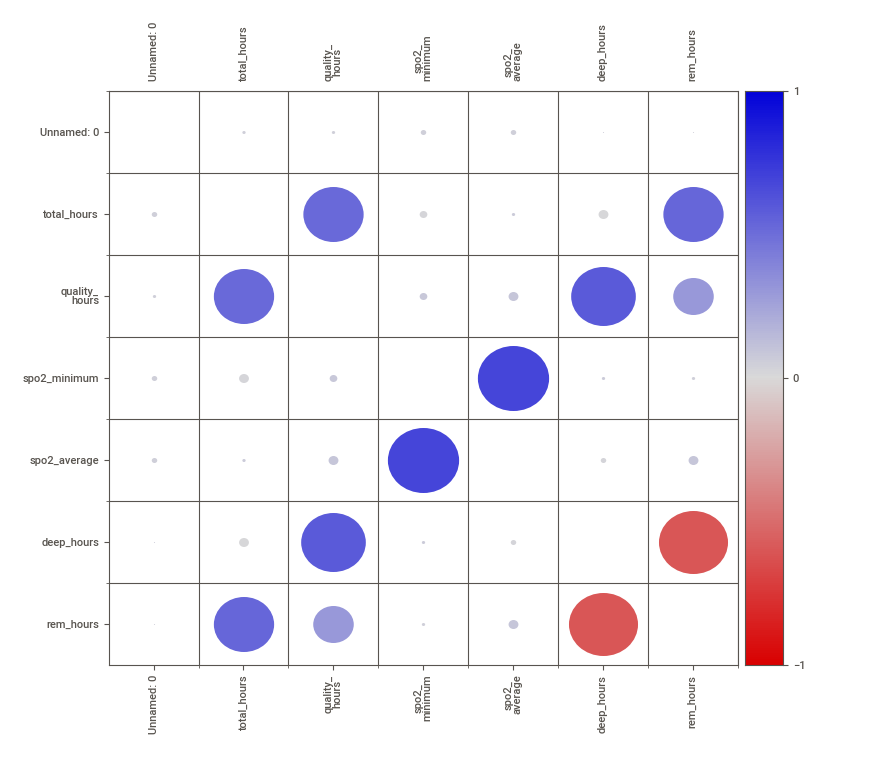
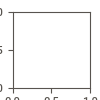

In [ ]:
my_report = sweetviz.analyze(df_sleep_records)
my_report.show_notebook()

### Survey Registration Records

In [ ]:
# Survey Registration
print(df_survey_reg.shape)
print(df_survey_reg.dtypes)
#df_survey_reg.head()
df_survey_reg.describe().T

(497, 12)
Client ID                                                                                                                                                                                   object
Timestamp                                                                                                                                                                           datetime64[ns]
Age                                                                                                                                                                                        float64
Sex                                                                                                                                                                                         object
For CISRS wearable monitoring services, you will require a compatible Garmin device with all health features. Do you have a device from the 'green' category in the image below?            object
Ethnicity      

count  ...   max
Age                                                 493.0  ...  85.0
In general, how would you rate your health on a...  491.0  ...   7.0
Ladder                                              491.0  ...  10.0
How would you like to help?                           0.0  ...   NaN
What do you define your Ethnicity as?                 0.0  ...   NaN

[5 rows x 8 columns]

#### Sweetviz Report

                                             |          | [  0%]   00:00 -> (? left)


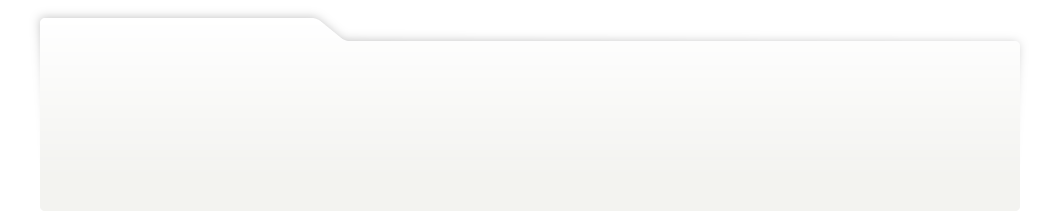
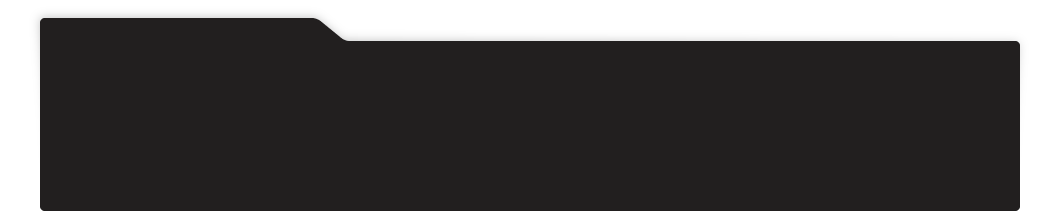
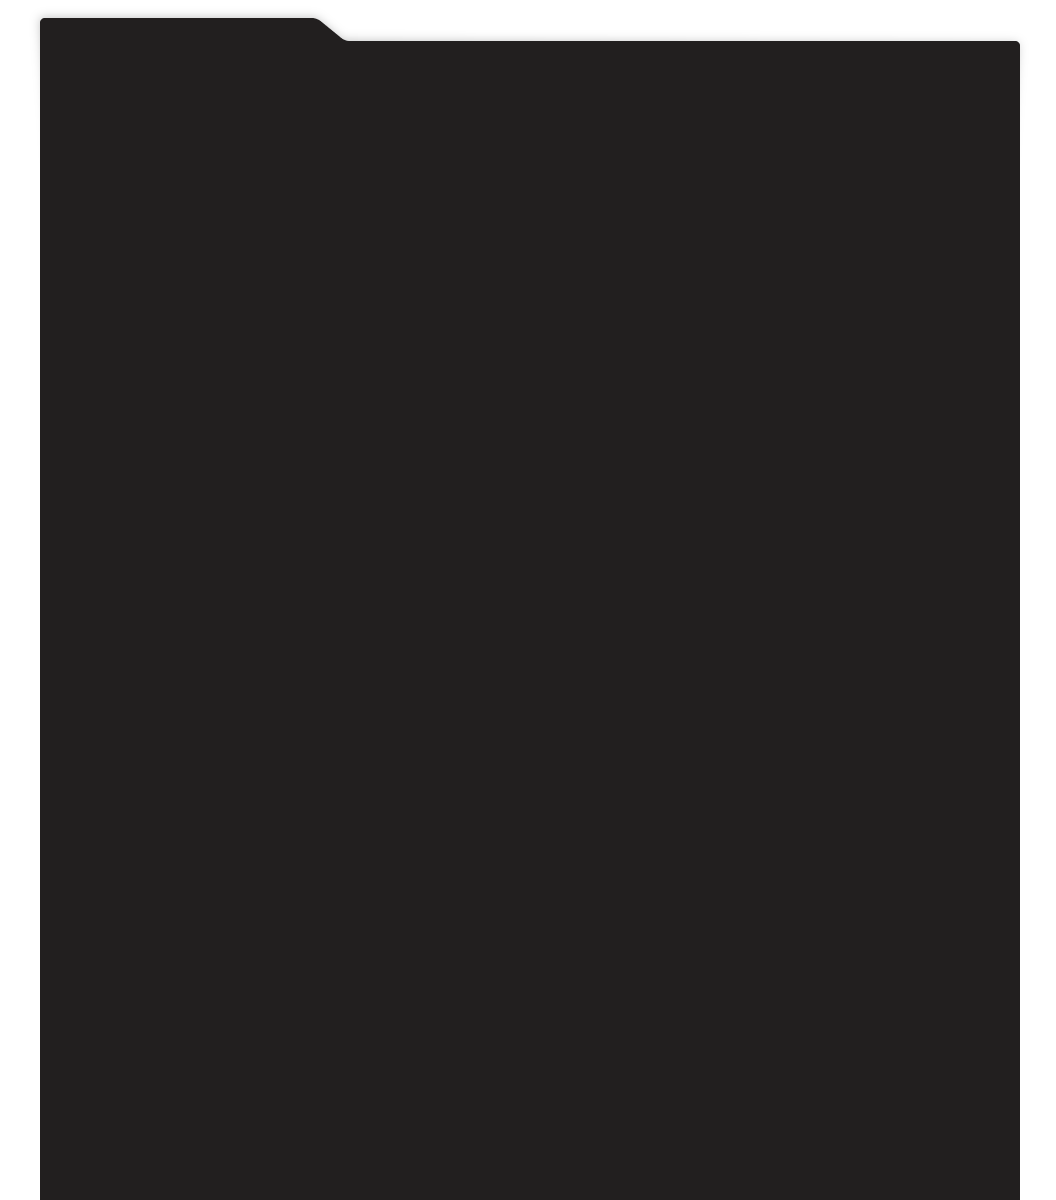
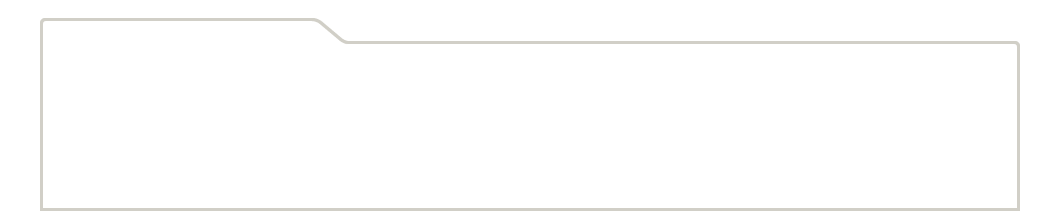
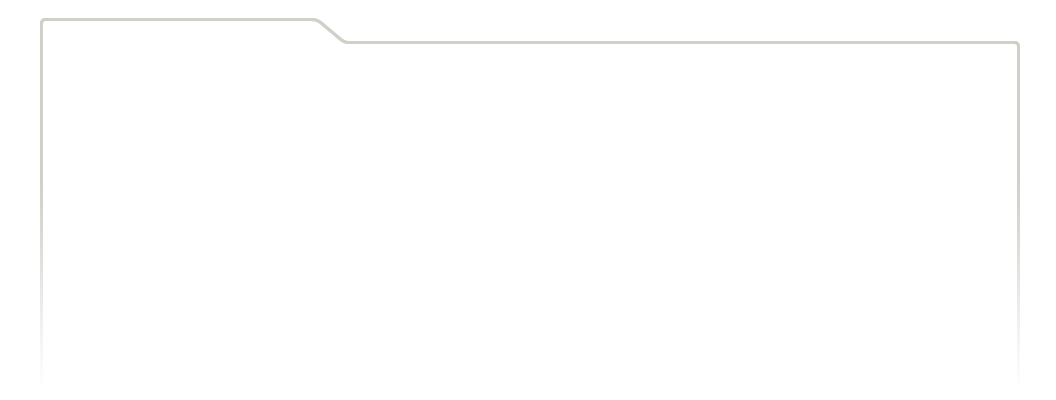
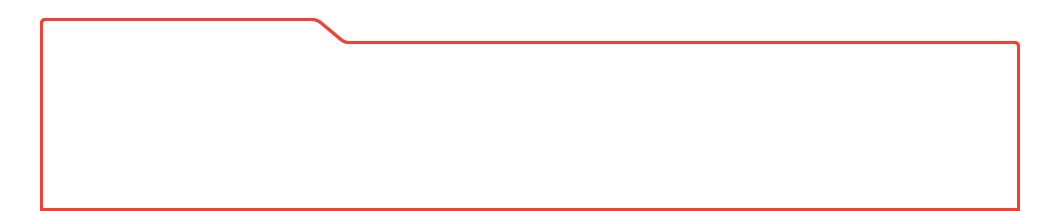
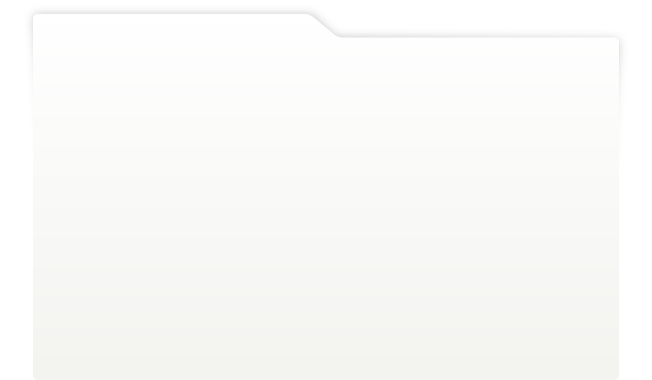
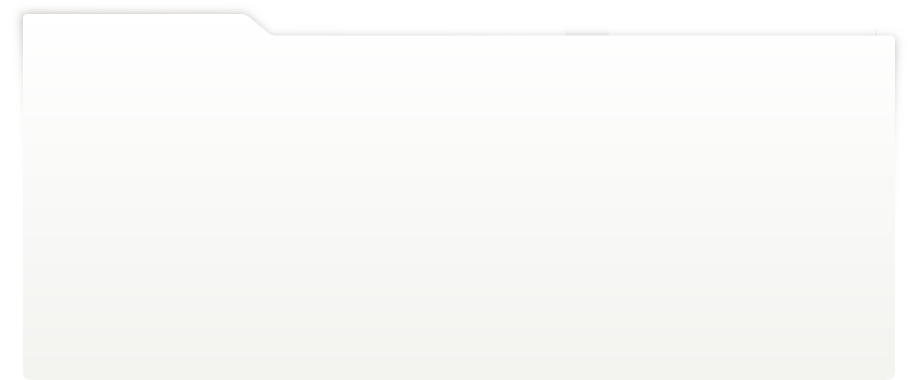
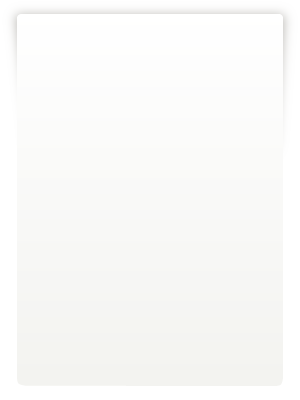
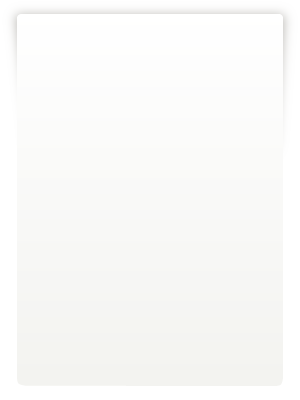
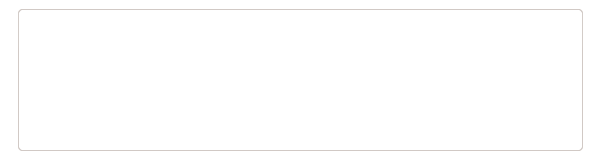
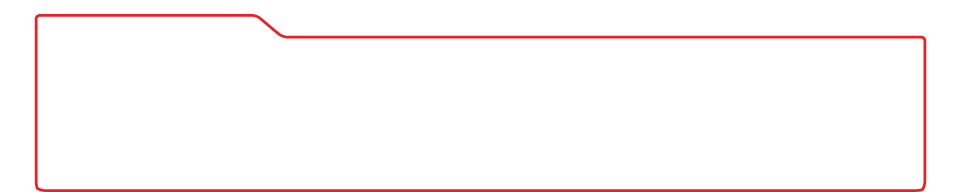
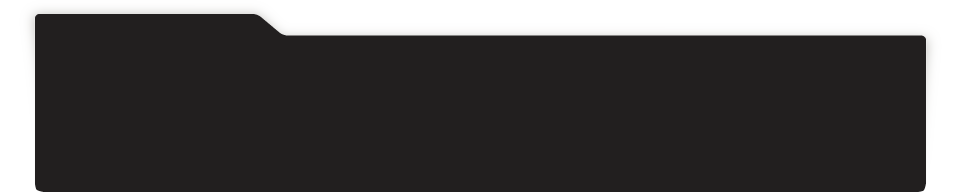
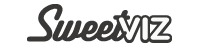
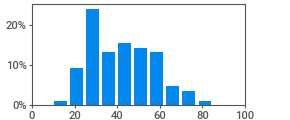
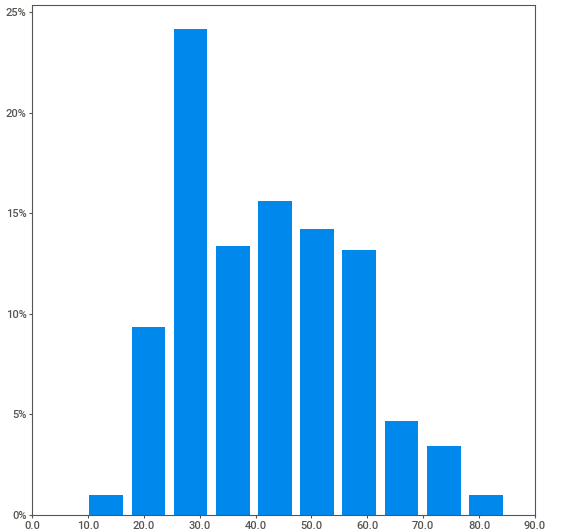
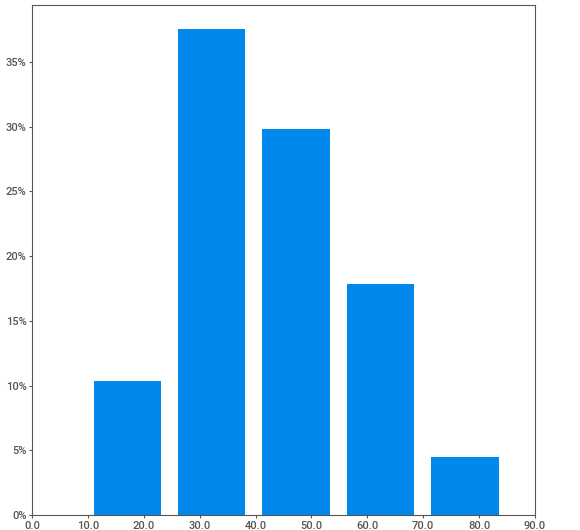
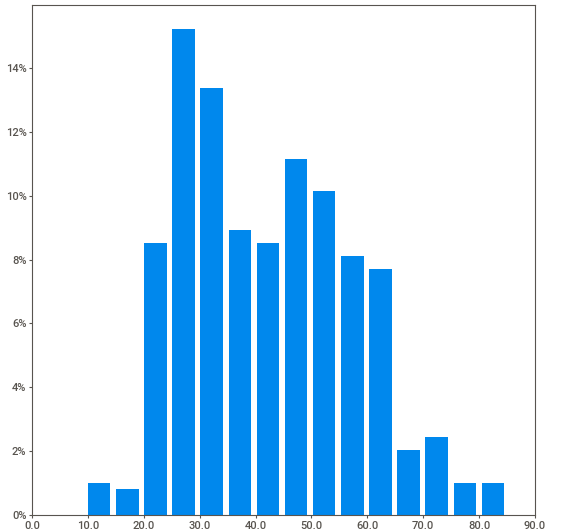
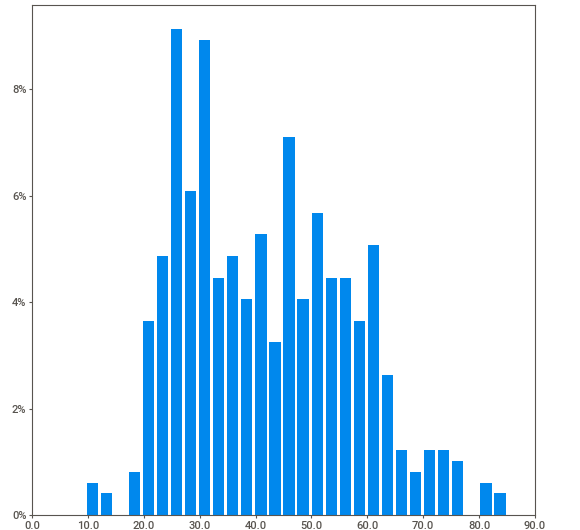
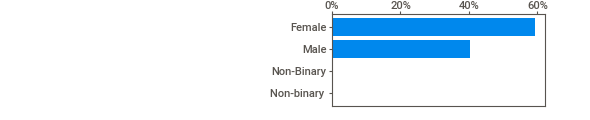
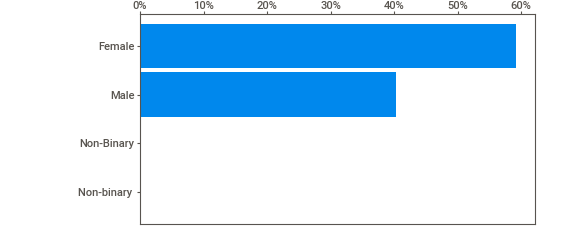
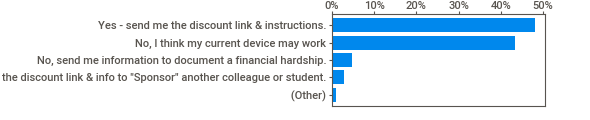
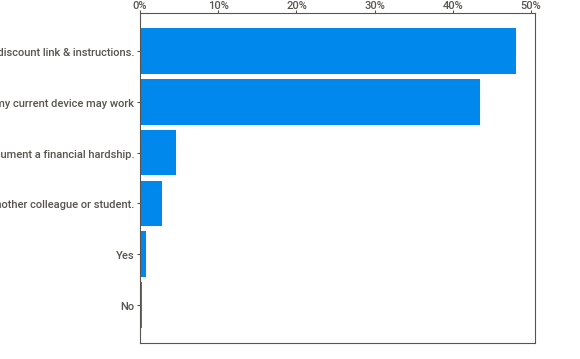
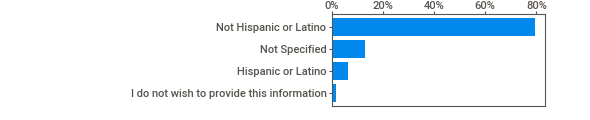
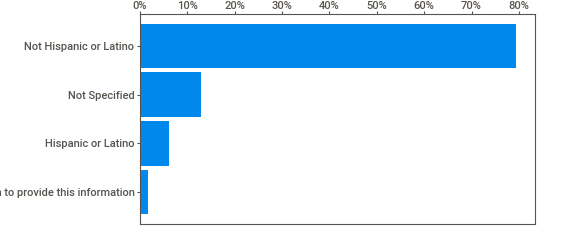
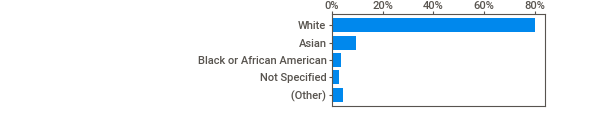
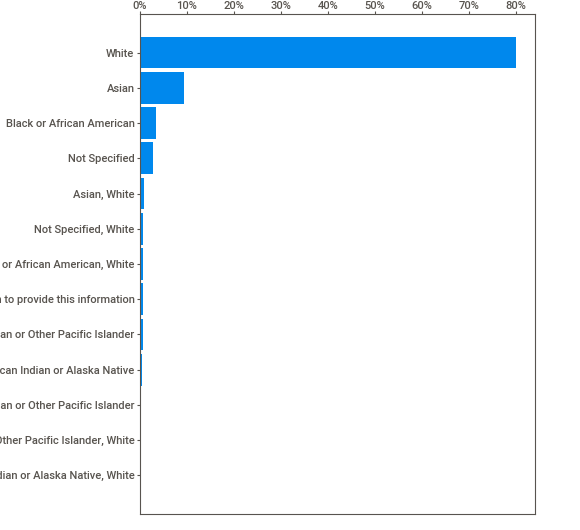
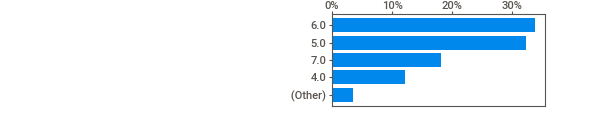
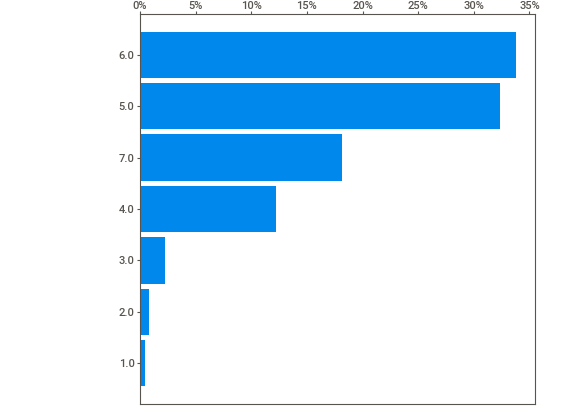
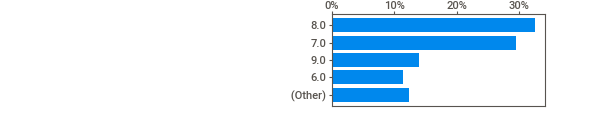
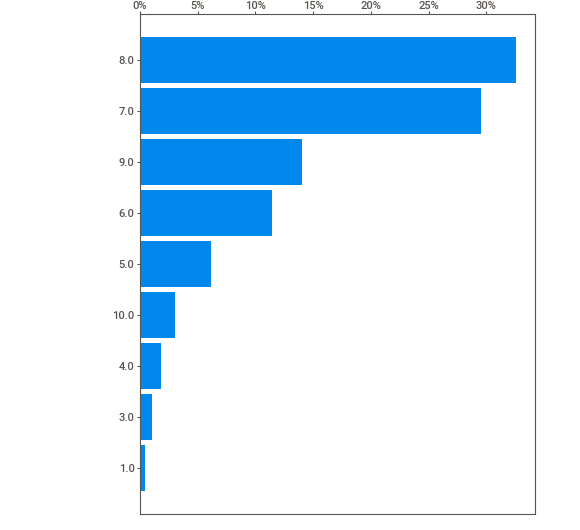
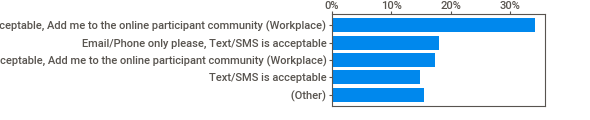
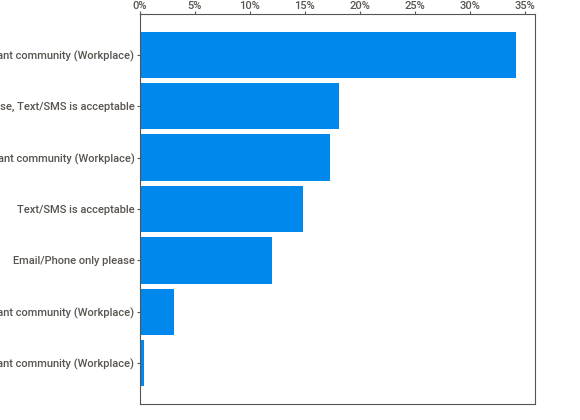
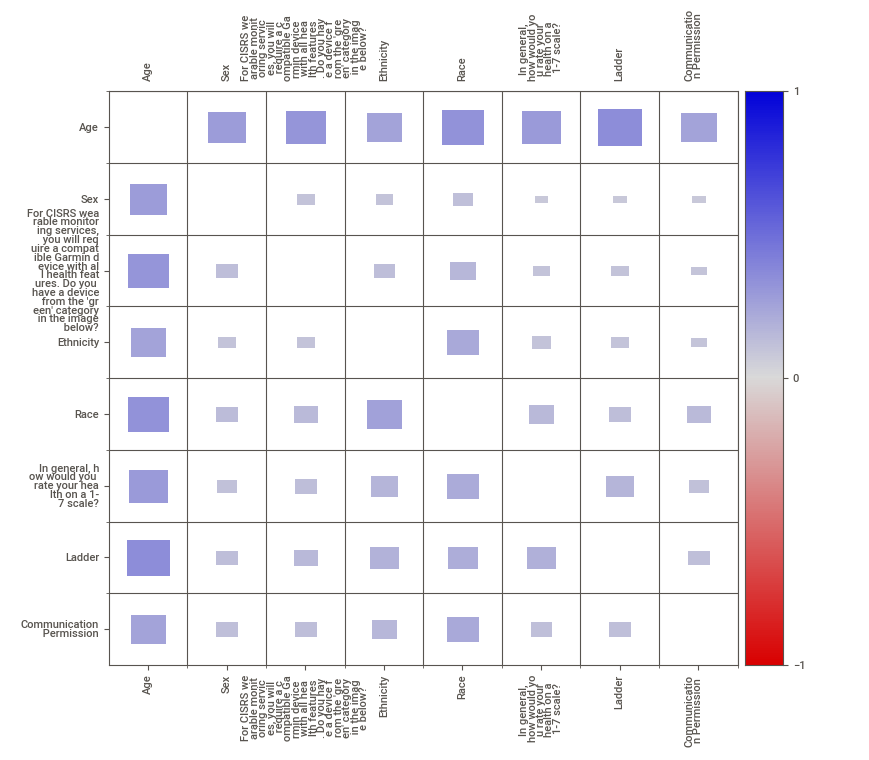
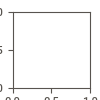

In [ ]:
my_report = sweetviz.analyze(df_survey_reg)
my_report.show_notebook()

### Survey Base Records

In [ ]:
# Survey Base
print(df_survey_base.shape)
print(df_survey_base.dtypes)
#df_survey_base.head()
df_survey_base.describe().T


(282, 101)
Timestamp                                                                                             datetime64[ns]
Client ID                                                                                                     object
Device Type                                                                                                   object
Tobacco Products                                                                                              object
Alcohol Consumption [1 drink]                                                                                 object
Medical Conditions                                                                                            object
Height (inches)                                                                                              float64
Weight (pounds)                                                                                              float64
How many total minutes of planned, leisure time physi

count  ...    max
Height (inches)                                     281.0  ...   76.0
Weight (pounds)                                     280.0  ...  282.0
Pain/Injury                                         282.0  ...    5.0
Feeling Down                                        282.0  ...    5.0
Light Intensity [Moderate intensity]                  0.0  ...    NaN
Light Intensity [Vigorous intensity]                  0.0  ...    NaN
Intensity [High Intensity (9-10)]                     0.0  ...    NaN
General Nutrition Rating                            282.0  ...    5.0
ACEs [Injury]                                         0.0  ...    NaN
ACEs [Mental Health]                                  0.0  ...    NaN
ACEs [Maternal Health]                                0.0  ...    NaN
ACEs [Infectious Disease]                             0.0  ...    NaN
ACEs [Chronic Disease]                                0.0  ...    NaN
ACEs [Risky Behavior]                                 0.0  ...    NaN
ACEs [Opportunities]                                  0.0  ...    NaN
Contemplative Practice [Unstructured Routine]         0.0  ...    NaN
Change Need                                         281.0  ...    5.0
Change Confidence                                   282.0  ...    5.0
Change Likelihood                                   282.0  ...    5.0
NPS                                                 282.0  ...   10.0
Intensity [Moderate intensity]                        0.0  ...    NaN
Intensity [Vigorous intensity]                        0.0  ...    NaN
How often do you wake feeling well rested?            0.0  ...    NaN
Intensity [Moderate intensity].1                      0.0  ...    NaN
Intensity [Vigorous intensity].1                      0.0  ...    NaN
Social Depth [Depth of connections]                   0.0  ...    NaN
Social Depth [Parent]                                 0.0  ...    NaN
Social Depth [Parent in-law]                          0.0  ...    NaN
Social Depth [Children (biological or not)]           0.0  ...    NaN
Social Depth [Close family]                           0.0  ...    NaN
Social Depth [Close neighbor]                         0.0  ...    NaN
Social Depth [Close friend]                           0.0  ...    NaN
Social Depth [Workmate]                               0.0  ...    NaN
Social Depth [Schoolmate/students]                    0.0  ...    NaN
Social Depth [Volunteers (charity)]                   0.0  ...    NaN
Social Depth [Group members (religious)]              0.0  ...    NaN
Social Depth [Other group (non-religious)]            0.0  ...    NaN
Social Network Index [Parent]                         0.0  ...    NaN
Social Network Index [Parent In-Law]                  0.0  ...    NaN
Social Network Index [Children (biological not ...    0.0  ...    NaN
Social Network Index [Other close family members]     0.0  ...    NaN
Social Network Index [Religious groups]               0.0  ...    NaN
Social Network Index [Students/School-mates]          0.0  ...    NaN
Social Network Index [Employee/Co-workers]            0.0  ...    NaN
Social Network Index [Close friends]                  0.0  ...    NaN
Social Network Index [Co-volunteer (charities/n...    0.0  ...    NaN
Social Network Index [Close neighbors]                0.0  ...    NaN
Social Network Index [Other groups (non-religio...    0.0  ...    NaN
Fruit/Vegetable [Prepared Foods (restaurant, etc)]    0.0  ...    NaN
Fruit/Vegetable [Minimally Processed Plant-based]     0.0  ...    NaN
Fruit/Vegetable [Minimally Processed Animal-based]    0.0  ...    NaN

[51 rows x 8 columns]

#### Sweetviz Report

In [ ]:
my_report = sweetviz.analyze(df_survey_base)
my_report.show_notebook()

Output hidden; open in https://colab.research.google.com to view.

### Survey Weekly Records

In [ ]:
# Survey Weekly
print(df_survey_weekly.shape)
print(df_survey_weekly.dtypes)
#df_survey_weekly.head()
df_survey_weekly.describe().T

(6148, 98)
Timestamp                                                                                        datetime64[ns]
Client ID                                                                                                object
Current Status                                                                                           object
Positive Factors [Energy/Vitality]                                                                       object
Positive Factors [Movement/Fitness]                                                                      object
Positive Factors [Nutrition/Intake]                                                                      object
Positive Factors [Sleep/Restfulness]                                                                     object
Positive Factors [Resilience/Toughness]                                                                  object
Positive Factors [Mental Acuity/Focus]                                                       

count       mean       std  ...   50%   75%   max
Distress Rating           13.0   7.692308  1.702186  ...   8.0   9.0  10.0
PSS SCORE                809.0  16.059333  7.061185  ...  17.0  21.0  36.0
Number Unique Symptoms  6123.0   0.068920  0.541471  ...   0.0   0.0   8.0
COVID Score             5674.0   0.034544  0.443380  ...   0.0   0.0  10.0
PainSites               5666.0   0.044476  0.449927  ...   0.0   0.0  11.0
PainScore               5666.0   0.090540  0.800546  ...   0.0   0.0  21.0

[6 rows x 8 columns]

#### Sweetviz Report

In [ ]:
my_report = sweetviz.analyze(df_survey_weekly)
my_report.show_notebook()

Output hidden; open in https://colab.research.google.com to view.